# Parte 1 - Operações com Pandas, Python, Pyspark e SQL


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importação das bibliotecas necessárias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import storage

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

***DICIONARIO DOS DADOS/COLUNAS***

**id** - ID exclusivo para cada filme e programa de TV

**tipo** - Identificador, um filme ou programa de TV

**titulo** - Título do filme ou programa de TV

**diretor** - Diretor do filme ou programa de tv

**elenco** - Atores envolvidos no filme ou show

**pais** - O país em que o filme ou programa de tv foi produzido

**data_adicionado** - Data em que foi adicionado ao Netflix

**ano_lancamento** - Ano de lançamento real

**classificacao** - Classificação de TV do filme / programa (ou seja, PG-13, TV-MA etc.)

**duracao** - Duração total em minutos ou número de temporadas

**genero** - O gênero, pode ter vários listados. Strings separadas por vírgulas

**descricao** - Uma descrição resumida do filme ou programa de tv (excluímos)

# Carregando o conjunto de dados em CSV utilizando a biblioteca Pandas e nomenado o DataSet, como: netflix_df

In [ ]:
netflix_df = pd.read_csv('/content/netflix_titles.csv', sep=',', parse_dates=['date_added'])
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Excluímos a coluna descrição**




In [ ]:
netflix_df.drop(['description'], axis=1, inplace=True)
netflix_df.drop(['director'], axis=1, inplace=True)
netflix_df.drop(['cast'], axis=1, inplace=True)

**Verificando as inconsistências**

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   country       7976 non-null   object        
 4   date_added    8797 non-null   datetime64[ns]
 5   release_year  8807 non-null   int64         
 6   rating        8803 non-null   object        
 7   duration      8804 non-null   object        
 8   listed_in     8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 619.4+ KB


In [ ]:
netflix_df.isnull()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False


In [ ]:
netflix_df.shape

(8807, 9)

In [ ]:
netflix_df.country.fillna("Nao Declarado", inplace=True)

\# Traduzindo as colunas e linhas essenciais ao projeto




**Tradução do Schema**

In [ ]:
netflix_df = netflix_df.rename({"show_id":"id","type":"tipo","title":"titulo","director":"diretor","cast":"elenco","country":"pais","date_added":"data_adicionado","release_year":"ano_lancamento","rating":"classificacao","duration":"duracao","listed_in":"genero"}, axis='columns')
netflix_df.head()

,id,tipo,titulo,pais,data_adicionado,ano_lancamento,classificacao,duracao,genero
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Nao Declarado,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Nao Declarado,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


**Tradução das linhas da coluna, TIPO!**

In [ ]:
netflix_df.tipo.replace(['Movie'], ['Filmes'], inplace = True)
netflix_df.tipo.replace(['TV Show'], ['Séries'], inplace = True)
netflix_df.head()

,id,tipo,titulo,pais,data_adicionado,ano_lancamento,classificacao,duracao,genero
0,s1,Filmes,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,Séries,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,Séries,Ganglands,Nao Declarado,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,Séries,Jailbirds New Orleans,Nao Declarado,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,Séries,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
netflix_df.tail()

,id,tipo,titulo,pais,data_adicionado,ano_lancamento,classificacao,duracao,genero
8802,s8803,Filmes,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,Séries,Zombie Dumb,Nao Declarado,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Filmes,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Filmes,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies"
8806,s8807,Filmes,Zubaan,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


**Tradução das linhas da coluna, DURACAO!**

In [ ]:
netflix_df.duracao.replace(['1 Season'], ['1 Temporada'], inplace = True)
netflix_df.duracao.replace(['2 Seasons'], ['2 Temporadas'], inplace = True)
netflix_df.duracao.replace(['3 Seasons'], ['3 Temporadas'], inplace = True)
netflix_df.duracao.replace(['4 Seasons'], ['4 Temporadas'], inplace = True)
netflix_df.duracao.replace(['5 Seasons'], ['5 Temporadas'], inplace = True)
netflix_df.duracao.replace(['6 Seasons'], ['6 Temporadas'], inplace = True)
netflix_df.duracao.replace(['7 Seasons'], ['7 Temporadas'], inplace = True)
netflix_df.duracao.replace(['8 Seasons'], ['8 Temporadas'], inplace = True)
netflix_df.duracao.replace(['9 Seasons'], ['9 Temporadas'], inplace = True)
netflix_df.duracao.replace(['10 Seasons'], ['10 Temporadas'], inplace = True)
netflix_df.duracao.replace(['11 Seasons'], ['11 Temporadas'], inplace = True)
netflix_df.duracao.replace(['12 Seasons'], ['12 Temporadas'], inplace = True)
netflix_df.duracao.replace(['13 Seasons'], ['13 Temporadas'], inplace = True)
netflix_df.duracao.replace(['14 Seasons'], ['14 Temporadas'], inplace = True)
netflix_df.duracao.replace(['15 Seasons'], ['15 Temporadas'], inplace = True)
netflix_df.duracao.replace(['16 Seasons'], ['16 Temporadas'], inplace = True)
netflix_df.duracao.replace(['17 Seasons'], ['17 Temporadas'], inplace = True)
netflix_df.head()

,id,tipo,titulo,pais,data_adicionado,ano_lancamento,classificacao,duracao,genero
0,s1,Filmes,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,Séries,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Temporadas,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,Séries,Ganglands,Nao Declarado,2021-09-24,2021,TV-MA,1 Temporada,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,Séries,Jailbirds New Orleans,Nao Declarado,2021-09-24,2021,TV-MA,1 Temporada,"Docuseries, Reality TV"
4,s5,Séries,Kota Factory,India,2021-09-24,2021,TV-MA,2 Temporadas,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
pd.unique(netflix_df['duracao'])

array(['90 min', '2 Temporadas', '1 Temporada', '91 min', '125 min',
       '9 Temporadas', '104 min', '127 min', '4 Temporadas', '67 min',
       '94 min', '5 Temporadas', '161 min', '61 min', '166 min',
       '147 min', '103 min', '97 min', '106 min', '111 min',
       '3 Temporadas', '110 min', '105 min', '96 min', '124 min',
       '116 min', '98 min', '23 min', '115 min', '122 min', '99 min',
       '88 min', '100 min', '6 Temporadas', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '7 Temporadas', '64 

**Tradução das linhas referente a coluna, CLASSIFICACAO!**

In [ ]:
netflix_df.loc[netflix_df.classificacao=='UNRATED',['classificacao']]='Não avaliado'
netflix_df.loc[netflix_df.classificacao=='NOT_RATE',['classificacao']]='Não avaliado'
netflix_df.loc[netflix_df.classificacao=='16',['classificacao']]='16+'
netflix_df.loc[netflix_df.classificacao=='G',['classificacao']]='Livre'
netflix_df.loc[netflix_df.classificacao=='E',['classificacao']]='Livre'
netflix_df.loc[netflix_df.classificacao=='R',['classificacao']]='Restrito'
netflix_df.loc[netflix_df.classificacao=='AO',['classificacao']]='Adultos'
netflix_df.loc[netflix_df.classificacao=='M',['classificacao']]='16+'
netflix_df.loc[netflix_df.classificacao=='ALL_AGES',['classificacao']]='Livre'
netflix_df.loc[netflix_df.classificacao=='AGES_18_',['classificacao']]='18+'
netflix_df.loc[netflix_df.classificacao=='AGES_16_',['classificacao']]='16+'
netflix_df.loc[netflix_df.classificacao=='NC-17',['classificacao']]='Adultos'
netflix_df.loc[netflix_df.classificacao=='ALL',['classificacao']]='Livre'
netflix_df.loc[netflix_df.classificacao=='NR',['classificacao']]='Adultos'
netflix_df.loc[netflix_df.classificacao=='PG',['classificacao']]='13+'
netflix_df.loc[netflix_df.classificacao=='NR',['classificacao']]='Adultos'
netflix_df.loc[netflix_df.classificacao=='PG',['classificacao']]='13+'
netflix_df.loc[netflix_df.classificacao=='TV-Y7',['classificacao']]='7+'
netflix_df.loc[netflix_df.classificacao=='TV-MA',['classificacao']]='Adultos'
netflix_df.loc[netflix_df.classificacao=='TV-14',['classificacao']]='14+'
netflix_df.loc[netflix_df.classificacao=='TV-G',['classificacao']]='Livre'
netflix_df.loc[netflix_df.classificacao=='TV-NR',['classificacao']]='Adultos'
netflix_df.loc[netflix_df.classificacao=='TV-Y',['classificacao']]='Infantil'
netflix_df.loc[netflix_df.classificacao=='TV-PG',['classificacao']]='7+'
netflix_df.loc[netflix_df.classificacao=='PG-13',['classificacao']]='13+'
#todos os campos desta coluna que estavam vazios recebem agora "Não avaliado"
netflix_df.classificacao.fillna("Não avaliado", inplace=True)
netflix_df.head(10)

,id,tipo,titulo,pais,data_adicionado,ano_lancamento,classificacao,duracao,genero
0,s1,Filmes,Dick Johnson Is Dead,United States,2021-09-25,2020,13+,90 min,Documentaries
1,s2,Séries,Blood & Water,South Africa,2021-09-24,2021,Adultos,2 Temporadas,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,Séries,Ganglands,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,Séries,Jailbirds New Orleans,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Docuseries, Reality TV"
4,s5,Séries,Kota Factory,India,2021-09-24,2021,Adultos,2 Temporadas,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,Séries,Midnight Mass,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"TV Dramas, TV Horror, TV Mysteries"
6,s7,Filmes,My Little Pony: A New Generation,Nao Declarado,2021-09-24,2021,13+,91 min,Children & Family Movies
7,s8,Filmes,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,Adultos,125 min,"Dramas, Independent Movies, International Movies"
8,s9,Séries,The Great British Baking Show,United Kingdom,2021-09-24,2021,14+,9 Temporadas,"British TV Shows, Reality TV"
9,s10,Filmes,The Starling,United States,2021-09-24,2021,13+,104 min,"Comedies, Dramas"


**Tradução das linhas referente a coluna, PAIS!**

In [ ]:
netflix_df.pais.replace(['Argentina'], ['Agentina'], inplace = True)
netflix_df.pais.replace(['Australia'], ['Austrália'], inplace = True)
netflix_df.pais.replace(['Austria'], ['Áustria'], inplace = True)
netflix_df.pais.replace(['Bangladesh'], ['Bangladesh'], inplace = True)
netflix_df.pais.replace(['Belarus'], ['Bielo-Rússia'], inplace = True)
netflix_df.pais.replace(['Belgium'], ['Bélgica'], inplace = True)
netflix_df.pais.replace(['Brazil'], ['Brasil'], inplace = True)
netflix_df.pais.replace(['Bulgaria'], ['Bulgária'], inplace = True)
netflix_df.pais.replace(['Cambodia'], ['Camboja'], inplace = True)
netflix_df.pais.replace(['Cameroon'], ['Camarões'], inplace = True)
netflix_df.pais.replace(['Canada'], ['Canadá'], inplace = True)
netflix_df.pais.replace(['Chile'], ['Chile'], inplace = True)
netflix_df.pais.replace(['China'], ['China'], inplace = True)
netflix_df.pais.replace(['Colombia'], ['Colômbia'], inplace = True)
netflix_df.pais.replace(['Croatia'], ['Croácia'], inplace = True)
netflix_df.pais.replace(['Cyprus'], ['Chipre'], inplace = True)
netflix_df.pais.replace(['Czech Republic'], ['República Checa'], inplace = True)
netflix_df.pais.replace(['Denmark'], ['Dinamarca'], inplace = True)
netflix_df.pais.replace(['Egypt'], ['Egito'], inplace = True)
netflix_df.pais.replace(['Finland'], ['Finlândia'], inplace = True)
netflix_df.pais.replace(['France'], ['França'], inplace = True)
netflix_df.pais.replace(['Georgia'], ['Georgia'], inplace = True)
netflix_df.pais.replace(['Germany'], ['Alemanha'], inplace = True)
netflix_df.pais.replace(['Ghana'], ['Gana'], inplace = True)
netflix_df.pais.replace(['Greece'], ['Grécia'], inplace = True)
netflix_df.pais.replace(['Guatemala'], ['Guatemala'], inplace = True)
netflix_df.pais.replace(['Hong Kong'], ['Hong Kong'], inplace = True)
netflix_df.pais.replace(['Hungary'], ['Hungria'], inplace = True)
netflix_df.pais.replace(['Iceland'], ['Islândia'], inplace = True)
netflix_df.pais.replace(['India'], ['Índia'], inplace = True)
netflix_df.pais.replace(['Indonesia'], ['Indonesia'], inplace = True)
netflix_df.pais.replace(['Iran'], ['Irã'], inplace = True)
netflix_df.pais.replace(['Ireland'], ['Irlanda'], inplace = True)
netflix_df.pais.replace(['Israel'], ['Israel'], inplace = True)
netflix_df.pais.replace(['Italy'], ['Italia'], inplace = True)
netflix_df.pais.replace(['Jamaica'], ['Jamaica'], inplace = True)
netflix_df.pais.replace(['Japan'], ['Japão'], inplace = True)
netflix_df.pais.replace(['Jordan'], ['Jordânia'], inplace = True)
netflix_df.pais.replace(['Kenya'], ['Quênia'], inplace = True)
netflix_df.pais.replace(['Kuwait'], ['Kuwait'], inplace = True)
netflix_df.pais.replace(['Lebanon'], ['Líbano'], inplace = True)
netflix_df.pais.replace(['Luxembourg'], ['Luxemburgo'], inplace = True)
netflix_df.pais.replace(['Malaysia'], ['Malásia'], inplace = True)
netflix_df.pais.replace(['Mauritius'], ['Maurício'], inplace = True)
netflix_df.pais.replace(['Mexico'], ['México'], inplace = True)
netflix_df.pais.replace(['Mozambique'], ['Moçambique'], inplace = True)
netflix_df.pais.replace(['Namibia'], ['Namíbia'], inplace = True)
netflix_df.pais.replace(['Netherlands'], ['Holanda'], inplace = True)
netflix_df.pais.replace(['New Zealand'], ['Nova Zelândia'], inplace = True)
netflix_df.pais.replace(['Nigeria'], ['Nigéria'], inplace = True)
netflix_df.pais.replace(['Norway'], ['Noruega'], inplace = True)
netflix_df.pais.replace(['Pakistan'], ['Paquistão'], inplace = True)
netflix_df.pais.replace(['Paraguay'], ['Paraguai'], inplace = True)
netflix_df.pais.replace(['Peru'], ['Peru'], inplace = True)
netflix_df.pais.replace(['Philippines'], ['Filipinas'], inplace = True)
netflix_df.pais.replace(['Poland'], ['Polônia'], inplace = True)
netflix_df.pais.replace(['Portugal'], ['Portugal'], inplace = True)
netflix_df.pais.replace(['Puerto Rico'], ['Porto Rico'], inplace = True)
netflix_df.pais.replace(['Romania'], ['Romênia'], inplace = True)
netflix_df.pais.replace(['Russia'], ['Rússia'], inplace = True)
netflix_df.pais.replace(['Saudi Arabia'], ['Arábia Saudita'], inplace = True)
netflix_df.pais.replace(['Senegal'], ['Senegal'], inplace = True)
netflix_df.pais.replace(['Serbia'], ['Sérvia'], inplace = True)
netflix_df.pais.replace(['Singapore'], ['Cingapura'], inplace = True)
netflix_df.pais.replace(['Slovenia'], ['Eslovênia'], inplace = True)
netflix_df.pais.replace(['Somalia'], ['Somália'], inplace = True)
netflix_df.pais.replace(['South Africa'], ['África do Sul'], inplace = True)
netflix_df.pais.replace(['South Korea'], ['Coreia do Sul'], inplace = True)
netflix_df.pais.replace(['Soviet Union'], ['União Soviética'], inplace = True)
netflix_df.pais.replace(['Spain'], ['Espanha'], inplace = True)
netflix_df.pais.replace(['Sweden'], ['Suécia'], inplace = True)
netflix_df.pais.replace(['Switzerland'], ['Suíça'], inplace = True)
netflix_df.pais.replace(['Syria'], ['Síria'], inplace = True)
netflix_df.pais.replace(['Taiwan'], ['Taiwan'], inplace = True)
netflix_df.pais.replace(['Thailand'], ['Tailândia'], inplace = True)
netflix_df.pais.replace(['Turkey'], ['Turquia'], inplace = True)
netflix_df.pais.replace(['Ukraine'], ['Ucrânia'], inplace = True)
netflix_df.pais.replace(['United Arab Emirates'], ['Emirados Árabes Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom'], ['Reino Unido'], inplace = True)
netflix_df.pais.replace(['United States'], ['Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Uruguay'], ['Uruguai'], inplace = True)
netflix_df.pais.replace(['Venezuela'], ['Venezuela'], inplace = True)
netflix_df.pais.replace(['Vietnam'], ['Vietnã'], inplace = True)
netflix_df.pais.replace(['West Germany'], ['Alemanha Ocidental'], inplace = True)
netflix_df.pais.replace(['Zimbabwe'], ['Zimbábue'], inplace = True)
netflix_df.pais.replace(['United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'], ['Estados Unidos, Gana, Burkina Faso, Reino Unido, Alemanha, Etiópia'], inplace = True)
netflix_df.pais.replace(['Reino Unido', 'Germany, Czech Republic', 'México', 'Turquia'], ['Reino Unido ',' Alemanha, República Tcheca ',' México ',' Turquia'], inplace = True)
netflix_df.pais.replace(['Turquia', 'Austrália', 'United States, India, France'], ['Turquia ',' Austrália ',' Estados Unidos, Índia, França'], inplace = True)
netflix_df.pais.replace(['Finlândia', 'China, Canada, United States'], ['Finlândia ',' China, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['South Africa, United States, Japan', 'Nigéria', 'Japão'], ['África do Sul, Estados Unidos, Japão ',' Nigéria ',' Japão'], inplace = True)
netflix_df.pais.replace(['Spain, United States', 'França', 'Bélgica'], ['Espanha, Estados Unidos ',' França ',' Bélgica'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States', 'United States, United Kingdom'], ['Reino Unido, Estados Unidos ',' Estados Unidos, Reino Unido'], inplace = True)
netflix_df.pais.replace(['France, United States', 'Coreia do Sul', 'Espanha'], ['França, Estados Unidos ',' Coreia do Sul ',' Espanha'], inplace = True)
netflix_df.pais.replace(['United States, Singapore', 'United Kingdom, Australia, France'], ['Estados Unidos, Cingapura ',' Reino Unido, Austrália, França'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Australia, France, United States'], ['Reino Unido, Austrália, França, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Canada', 'Germany, United States'], ['Estados Unidos, Canadá ',' Alemanha, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['South Africa, United States', 'United States, Mexico'], ['África do Sul, Estados Unidos ',' Estados Unidos, México'], inplace = True)
netflix_df.pais.replace(['United States, Italy, France, Japan'], ['Estados Unidos, Itália, França, Japão'], inplace = True)
netflix_df.pais.replace(['United States, Italy, Romania, United Kingdom'], ['Estados Unidos, Itália, Romênia, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Australia, United States', 'Argentina, Venezuela'], ['Austrália, Estados Unidos ',' Argentina, Venezuela'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Canada', 'China, Hong Kong'], ['Estados Unidos, Reino Unido, Canadá ',' China, Hong Kong'], inplace = True)
netflix_df.pais.replace(['Rússia', 'Canadá', 'Hong Kong', 'United States, China, Hong Kong'], ['Rússia ',' Canadá ',' Hong Kong ',' Estados Unidos, China, Hong Kong'], inplace = True)
netflix_df.pais.replace(['Estados Unidos, China, Hong Kong', 'Italy, United States'], ['Estados Unidos, China, Hong Kong ',' Itália, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Germany', 'United Kingdom, Canada, United States'], ['Estados Unidos, Alemanha ',' Reino Unido, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Reino Unido, Canadá, Estados Unidos', ', South Korea', 'Irlanda'], ['Reino Unido, Canadá, Estados Unidos ',', Coreia do Sul ',' Irlanda'], inplace = True)
netflix_df.pais.replace(['New Zealand, Australia, France, United States', 'Italia'], ['Nova Zelândia, Austrália, França, Estados Unidos ',' Itália'], inplace = True)
netflix_df.pais.replace(['Italy, Brazil, Greece', 'Agentina', 'Jordânia', 'Colômbia'], ['Itália, Brasil, Grécia ',' Agentina ',' Jordânia ',' Colômbia'], inplace = True)
netflix_df.pais.replace(['United States, Japan', 'Belgium, United Kingdom'], ['Estados Unidos, Japão ',' Bélgica, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Switzerland, United Kingdom, Australia', 'Israel, United States'], ['Suíça, Reino Unido, Austrália ',' Israel, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Canada, United States', 'Brasil', 'Argentina, Spain', 'Taiwan'], ['Canadá, Estados Unidos ',' Brasil ',' Argentina, Espanha ',' Taiwan'], inplace = True)
netflix_df.pais.replace(['Taiwan', 'United States, Nigeria', 'Bulgaria, United States'], ['Taiwan ',' Estados Unidos, Nigéria ',' Bulgária, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Spain, United Kingdom, United States', 'United States, China'], ['Espanha, Reino Unido, Estados Unidos ',' Estados Unidos, China'], inplace = True)
netflix_df.pais.replace(['United States, France'], ['Estados Unidos, França'], inplace = True)
netflix_df.pais.replace(['Spain, France, United Kingdom, United States'], ['Espanha, França, Reino Unido, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['France, Algeria', 'Polônia', 'Alemanha'], ['França, Argélia ',' Polônia ',' Alemanha'], inplace = True)
netflix_df.pais.replace(['France, Israel, Germany, United States, United Kingdom'], ['França, Israel, Alemanha, Estados Unidos, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Egypt, Denmark, Germany', 'United States, Switzerland'], ['Egito, Dinamarca, Alemanha ',' Estados Unidos, Suíça'], inplace = True)
netflix_df.pais.replace(['Hong Kong, Canada, United States', 'Kuwait, United States'], ['Hong Kong, Canadá, Estados Unidos ',' Kuwait, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['France, Canada, United States, Spain'], ['França, Canadá, Estados Unidos, Espanha'], inplace = True)
netflix_df.pais.replace(['France, Netherlands, Singapore', 'France, Belgium'], ['França, Holanda, Singapura ',' França, Bélgica'], inplace = True)
netflix_df.pais.replace(['Ireland, United States, United Kingdom', 'Egito', 'Malásia'], ['Irlanda, Estados Unidos, Reino Unido ',' Egito ',' Malásia'], inplace = True)
netflix_df.pais.replace(['Israel', 'Australia, New Zealand', 'United Kingdom, Germany'], ['Israel ',' Austrália, Nova Zelândia ',' Reino Unido, Alemanha'], inplace = True)
netflix_df.pais.replace(['Belgium, Netherlands', 'South Korea, Czech Republic'], ['Bélgica, Holanda ',' Coreia do Sul, República Tcheca'], inplace = True)
netflix_df.pais.replace(['Australia, Germany', 'Vietnã', 'United Kingdom, Belgium'], ['Austrália, Alemanha ',' Vietnã ',' Reino Unido, Bélgica'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Australia, United States'], ['Reino Unido, Austrália, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['France, Japan, United States'], ['França, Japão, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Germany, Spain, United States'], ['Reino Unido, Alemanha, Espanha, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States, France, Italy'], ['Reino Unido, Estados Unidos, França, Itália'], inplace = True)
netflix_df.pais.replace(['United States, Germany, Canada'], ['Estados Unidos, Alemanha, Canadá'], inplace = True)
netflix_df.pais.replace(['United States, France, Italy, United Kingdom'], ['Estados Unidos, França, Itália, Reino Unido'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Germany, Hungary'], ['Estados Unidos, Reino Unido, Alemanha, Hungria'], inplace = True)
netflix_df.pais.replace(['United States, New Zealand', 'Suécia', 'China', 'Líbano'], ['Estados Unidos, Nova Zelândia ',' Suécia ',' China ',' Líbano'], inplace = True)
netflix_df.pais.replace(['Romênia', 'Finland, Germany', 'Lebanon, Syria', 'Filipinas'], ['Romênia ',' Finlândia, Alemanha ',' Líbano, Síria ',' Filipinas'], inplace = True)
netflix_df.pais.replace(['Philippines, Singapore, Indonesia'], ['Filipinas, Cingapura, Indonésia'], inplace = True)
netflix_df.pais.replace(['Lebanon, United Arab Emirates', 'Canada, United States, Denmark'], ['Líbano, Emirados Árabes Unidos ',' Canadá, Estados Unidos, Dinamarca'], inplace = True)
netflix_df.pais.replace(['Filipinas', 'Islândia', 'Dinamarca', 'United States, India'], ['Filipinas ',' Islândia ',' Dinamarca ',' Estados Unidos, Índia'], inplace = True)
netflix_df.pais.replace(['Mexico, France, Colombia', 'Holanda'], ['México, França, Colômbia ',' Holanda'], inplace = True)
netflix_df.pais.replace(['Germany, United States, France', 'United States, Bulgaria'], ['Alemanha, Estados Unidos, França ',' Estados Unidos, Bulgária'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, Germany, United States'], ['Reino Unido, França, Alemanha, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Reino Unido, França, Alemanha, Estados Unidos', 'Norway, Denmark'], ['Reino Unido, França, Alemanha, Estados Unidos ',' Noruega, Dinamarca'], inplace = True)
netflix_df.pais.replace(['Noruega, Dinamarca', 'Syria, France, Lebanon, Qatar'], ['Noruega, Dinamarca ',' Síria, França, Líbano, Qatar'], inplace = True)
netflix_df.pais.replace(['United States, Czech Republic', 'Maurício'], ['Estados Unidos, República Tcheca ',' Maurício'], inplace = True)
netflix_df.pais.replace(['Canada, South Africa', 'Áustria', 'Mexico, Brazil'], ['Canadá, África do Sul ',' Áustria ',' México, Brasil'], inplace = True)
netflix_df.pais.replace(['Germany, France', 'Mexico, United States'], ['Alemanha, França ',' México, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, Spain, United States'], ['Reino Unido, França, Espanha, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Australia'], ['Estados Unidos, Austrália'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, France', 'United States, Russia'], ['Estados Unidos, Reino Unido, França ',' Estados Unidos, Rússia'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, New Zealand'], ['Estados Unidos, Reino Unido, Nova Zelândia'], inplace = True)
netflix_df.pais.replace(['Australia, United Kingdom', 'Canada, Nigeria, United States'], ['Austrália, Reino Unido ',' Canadá, Nigéria, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['France, United States, United Kingdom, Canada'], ['França, Estados Unidos, Reino Unido, Canadá'], inplace = True)
netflix_df.pais.replace(['France, United Kingdom', 'India, United Kingdom'], ['França, Reino Unido ',' Índia, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Canada, United States, Mexico'], ['Canadá, Estados Unidos, México'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Germany, United States'], ['Reino Unido, Alemanha, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Czech Republic, United Kingdom, United States'], ['República Tcheca, Reino Unido, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['China, United Kingdom', 'Italy, United Kingdom', 'China, Taiwan'], ['China, Reino Unido ',' Itália, Reino Unido ',' China, Taiwan'], inplace = True)
netflix_df.pais.replace(['United States, Brazil, Japan, Spain, India'], ['Estados Unidos, Brasil, Japão, Espanha, Índia'], inplace = True)
netflix_df.pais.replace(['United States, China, United Kingdom', 'Camarões'], ['Estados Unidos, China, Reino Unido ',' Camarões'], inplace = True)
netflix_df.pais.replace(['Lebanon, Palestine, Denmark, Qatar', 'Japan, United States'], ['Líbano, Palestina, Dinamarca, Qatar ',' Japão, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Uruguay, Germany', 'Egypt, Saudi Arabia'], ['Uruguai, Alemanha ',' Egito, Arábia Saudita'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, Poland, Germany, United States'], ['Reino Unido, França, Polônia, Alemanha, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Ireland, Switzerland, United Kingdom, France, United States'], ['Irlanda, Suíça, Reino Unido, França, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, South Africa, France'], ['Reino Unido, África do Sul, França'], inplace = True)
netflix_df.pais.replace(['Ireland, United Kingdom, France, Germany'], ['Irlanda, Reino Unido, França, Alemanha'], inplace = True)
netflix_df.pais.replace(['Irlanda, Reino Unido, França, Alemanha', 'Russia, United States'], ['Irlanda, Reino Unido, França, Alemanha ',' Rússia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Rússia, Estados Unidos', 'United Kingdom, United States, France'], ['Rússia, Estados Unidos ',' Reino Unido, Estados Unidos, França'], inplace = True)
netflix_df.pais.replace(['United Kingdom,', 'United States, India, United Kingdom'], ['Reino Unido, ',' Estados Unidos, Índia, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Spain, Argentina', 'India, United Kingdom, France, Qatar'], ['Espanha, Argentina ',' Índia, Reino Unido, França, Catar'], inplace = True)
netflix_df.pais.replace(['Belgium, France', 'Argentina, Chile', 'United States, Thailand'], ['Bélgica, França ',' Argentina, Chile ',' Estados Unidos, Tailândia'], inplace = True)
netflix_df.pais.replace(['United States, Colombia', 'Canada, United States, United Kingdom'], ['Estados Unidos, Colômbia ',' Canadá, Estados Unidos, Reino Unido'], inplace = True)
netflix_df.pais.replace(['United States, Cambodia, Romania', 'Bangladesh'], ['Estados Unidos, Camboja, Romênia ',' Bangladesh'], inplace = True)
netflix_df.pais.replace(['Spain, Belgium, United States'], ['Espanha, Bélgica, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States, Australia'], ['Reino Unido, Estados Unidos, Austrália'], inplace = True)
netflix_df.pais.replace(['Canada, United States, France', 'Portugal, United States'], ['Canadá, Estados Unidos, França ',' Portugal, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Portugal, Spain', 'India, United States'], ['Portugal, Espanha ',' Índia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Ireland', 'United Kingdom, Spain, United States'], ['Reino Unido, Irlanda ',' Reino Unido, Espanha, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Hungary, United States', 'United States, South Korea'], ['Hungria, Estados Unidos ',' Estados Unidos, Coreia do Sul'], inplace = True)
netflix_df.pais.replace(['Canada, United States, Cayman Islands', 'India, France'], ['Canadá, Estados Unidos, Ilhas Cayman ',' Índia, França'], inplace = True)
netflix_df.pais.replace(['France, Canada', 'Canada, Hungary, United States', 'Noruega'], ['França, Canadá ',' Canadá, Hungria, Estados Unidos ',' Noruega'], inplace = True)
netflix_df.pais.replace(['Canada, United Kingdom, United States'], ['Canadá, Reino Unido, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Germany, France, United States'], ['Reino Unido, Alemanha, França, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Denmark, United States', 'Senegal', 'França, Argélia'], ['Dinamarca, Estados Unidos ',' Senegal ',' França, Argélia'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Finland, Germany, United States, Australia, Japan, France, Ireland'], ['Reino Unido, Finlândia, Alemanha, Estados Unidos, Austrália, Japão, França, Irlanda'], inplace = True)
netflix_df.pais.replace(['Philippines, Canada, United Kingdom, United States'], ['Filipinas, Canadá, Reino Unido, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong'], ['Irlanda, França, Islândia, Estados Unidos, México, Bélgica, Reino Unido, Hong Kong'], inplace = True)
netflix_df.pais.replace(['Cingapura', 'Kuwait', 'United States, France, Serbia'], ['Cingapura ',' Kuwait ',' Estados Unidos, França, Sérvia'], inplace = True)
netflix_df.pais.replace(['United States, Italy', 'Spain, Italy'], ['Estados Unidos, Itália ',' Espanha, Itália'], inplace = True)
netflix_df.pais.replace(['United States, Ireland, United Kingdom, India'], ['Estados Unidos, Irlanda, Reino Unido, Índia'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Singapore', 'Hong Kong, United States'], ['Reino Unido, Singapura ',' Hong Kong, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Malta, France, United Kingdom'], ['Estados Unidos, Malta, França, Reino Unido'], inplace = True)
netflix_df.pais.replace(['United States, China, Canada', 'Canada, United States, Ireland'], ['Estados Unidos, China, Canadá ',' Canadá, Estados Unidos, Irlanda'], inplace = True)
netflix_df.pais.replace(['Canadá, Estados Unidos, Irlanda', 'Lebanon, Canada, France'], ['Canadá, Estados Unidos, Irlanda ',' Líbano, Canadá, França'], inplace = True)
netflix_df.pais.replace(['Japan, Canada, United States', 'Spain, France, Canada'], ['Japão, Canadá, Estados Unidos ',' Espanha, França, Canadá'], inplace = True)
netflix_df.pais.replace(['Denmark, Singapore, Canada, United States'], ['Dinamarca, Cingapura, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, France, Denmark', 'United States, China, Colombia'], ['Estados Unidos, França, Dinamarca ',' Estados Unidos, China, Colômbia'], inplace = True)
netflix_df.pais.replace(['Spain, Thailand, United States', 'Mexico, Spain'], ['Espanha, Tailândia, Estados Unidos ',' México, Espanha'], inplace = True)
netflix_df.pais.replace(['Ireland, Luxembourg, Belgium', 'China, United States'], ['Irlanda, Luxemburgo, Bélgica ',' China, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Canada, Belgium', 'Canada, United Kingdom'], ['Canadá, Bélgica ',' Canadá, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Lebanon, United Arab Emirates, France, Switzerland, Germany'], ['Líbano, Emirados Árabes Unidos, França, Suíça, Alemanha'], inplace = True)
netflix_df.pais.replace(['France, Belgium, Italy'], ['França, Bélgica, Itália'], inplace = True)
netflix_df.pais.replace(['Lebanon, United States, United Arab Emirates', 'Lebanon, France'], ['Líbano, Estados Unidos, Emirados Árabes Unidos ',' Líbano, França'], inplace = True)
netflix_df.pais.replace(['Líbano, França', 'France, Lebanon'], ['Líbano, França ',' França, Líbano'], inplace = True)
netflix_df.pais.replace(['France, Lebanon, United Kingdom'], ['França, Líbano, Reino Unido'], inplace = True)
netflix_df.pais.replace(['França, Líbano, Reino Unido', 'France, Norway, Lebanon, Belgium'], ['França, Líbano, Reino Unido ',' França, Noruega, Líbano, Bélgica'], inplace = True)
netflix_df.pais.replace(['Sweden, Czech Republic, United Kingdom, Denmark, Netherlands'], ['Suécia, República Tcheca, Reino Unido, Dinamarca, Holanda'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, India', 'Indonesia, Netherlands'], ['Estados Unidos, Reino Unido, Índia ',' Indonésia, Holanda'], inplace = True)
netflix_df.pais.replace(['Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay',], ['Austrália, Armênia, Japão, Jordânia, México, Mongólia, Nova Zelândia, Filipinas, África do Sul, Suécia, Estados Unidos, Uruguai',], inplace = True)
netflix_df.pais.replace(['Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay',], ['Austrália, Armênia, Japão, Jordânia, México, Mongólia, Nova Zelândia, Filipinas, África do Sul, Suécia, Estados Unidos, Uruguai',], inplace = True)
netflix_df.pais.replace(['Ireland, United Kingdom'], ['Irlanda, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay',], ['Austrália, Armênia, Japão, Jordânia, México, Mongólia, Nova Zelândia, Filipinas, África do Sul, Suécia, Estados Unidos, Uruguai'], inplace = True)
netflix_df.pais.replace(['China, United States, Australia'], ['China, Estados Unidos, Austrália'], inplace = True)
netflix_df.pais.replace(['Ireland, United Kingdom'], ['Irlanda, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Poland,'], ['Polônia,'], inplace = True)                        
netflix_df.pais.replace(['United Kingdom, Australia'], ['Reino Unido, Austrália'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Italy'], ['Reino Unido, Itália'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Norway, Denmark, Germany, Sweden'], ['Reino Unido, Noruega, Dinamarca, Alemanha, Suécia'], inplace = True) 
netflix_df.pais.replace(['United Kingdom, United States, Morocco'], ['Reino Unido, Estados Unidos, Marrocos'], inplace = True)

In [ ]:
netflix_df.pais.replace(['Turkey, South Korea', 'Serbia, United States', 'Namíbia'], ['Turquia, Coreia do Sul', 'Sérvia, Estados Unidos', 'Namíbia'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Kenya', 'United Kingdom, France, Germany, Spain'], ['Reino Unido, Quênia', 'Reino Unido, França, Alemanha, Espanha'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, United States, Belgium, Luxembourg, China, Germany'], [ 'Reino Unido, França, Estados Unidos, Bélgica, Luxemburgo, China, Alemanha'], inplace = True)
netflix_df.pais.replace(['Thailand, United States'], ['Tailândia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, France, Canada, Belgium', 'United Kingdom, China'], ['Estados Unidos, França, Canadá, Bélgica', 'Reino Unido, China'], inplace = True)
netflix_df.pais.replace(['Germany, China, United Kingdom'], ['Alemanha, China, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Australia, New Zealand, United States'], ['Austrália, Nova Zelândia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Hong Kong, Iceland, United States', 'France, Australia, Germany'], ['Hong Kong, Islândia, Estados Unidos', 'França, Austrália, Alemanha'], inplace = True)
netflix_df.pais.replace(['United States, Belgium, Canada, France', 'South Africa, Angola'], ['Estados Unidos, Bélgica, Canadá, França', 'África do Sul, Angola'], inplace = True)
netflix_df.pais.replace(['United States, Philippines'], ['Estados Unidos, Filipinas'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Canada, China'], ['Estados Unidos, Reino Unido, Canadá, China'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Canada, China'], ['Estados Unidos, Reino Unido, Canadá, China'], inplace = True)
netflix_df.pais.replace(['United States, Canada, United Kingdom', 'Turkey, United States'], ['Estados Unidos, Canadá, Reino Unido', 'Turquia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Peru, Germany, Norway', 'Moçambique', 'Brazil, France'], ['Peru, Alemanha, Noruega', 'Moçambique', 'Brasil, França'], inplace = True)
netflix_df.pais.replace(['China, Spain, South Korea, United States', 'Spain, Germany'], ['China, Espanha, Coreia do Sul, Estados Unidos', 'Espanha, Alemanha'], inplace = True)
netflix_df.pais.replace(['Hong Kong, China', 'France, Belgium, Luxembourg, Cambodia,'], ['Hong Kong, China', 'França, Bélgica, Luxemburgo, Camboja'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Australia', 'Bielo-Rússia'], ['United Kingdom, Australia', 'Bielo-Rússia'], inplace = True)
netflix_df.pais.replace(['Indonesia, United Kingdom'], ['Indonésia, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Switzerland, France, Belgium, United States', 'Gana'], ['Suíça, França, Bélgica, Estados Unidos', 'Gana'], inplace = True)
netflix_df.pais.replace(['Spain, France, Canada, United States', 'Chile, Italy'], ['Espanha, França, Canadá, Estados Unidos', 'Chile, Itália'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Nigeria', 'Chile', 'France, Egypt'], ['Reino Unido, Nigéria', 'Chile', 'França, Egito'], inplace = True)
netflix_df.pais.replace(['Egypt, France', 'France, Brazil, Spain, Belgium'], ['Egito, França', 'França, Brasil, Espanha, Bélgica'], inplace = True)
netflix_df.pais.replace(['Egypt, Algeria', 'Canada, South Korea, United States'], ['Egito, Argélia', 'Canadá, Coreia do Sul, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Nigeria, United Kingdom', 'United States, France, Canada'], ['Nigéria, Reino Unido', 'Estados Unidos, França, Canadá'], inplace = True)
netflix_df.pais.replace(['Poland, United States'], ['Polônia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Arab Emirates, Jordan, Lebanon, Saudi Arabia'], ['Emirados Árabes Unidos, Jordânia, Líbano, Arábia Saudita'], inplace = True)
netflix_df.pais.replace(['United States, Mexico, Spain, Malta'], ['Estados Unidos, México, Espanha, Malta'], inplace = True)
netflix_df.pais.replace(['Saudi Arabia, United Arab Emirates', 'Zimbábue'], ['Arábia Saudita, Emirados Árabes Unidos', 'Árundo'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Germany, United Arab Emirates, New Zealand'], ['Reino Unido, Alemanha, Emirados Árabes Unidos, Nova Zelândia'], inplace = True)
netflix_df.pais.replace(['Romania, United States', 'Canada, Nigeria'], ['Romênia, Estados Unidos', 'Canadá, Nigéria'], inplace = True)
netflix_df.pais.replace(['Saudi Arabia, Netherlands, Germany, Jordan, United Arab Emirates, United States'], ['Arábia Saudita, Holanda, Alemanha, Jordânia, Emirados Árabes Unidos, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Spain', 'Finland, France'], ['Reino Unido, Espanha', 'Finlândia, França'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Germany, United States, France'], ['Reino Unido, Alemanha, Estados Unidos, França'], inplace = True)
netflix_df.pais.replace(['India, United Kingdom, China, Canada, Japan, South Korea, United States'], ['Índia, Reino Unido, China, Canadá, Japão, Coreia do Sul, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Italy, United Kingdom, France', 'United States, Mexico, Colombia'], ['Itália, Reino Unido, França', 'Estados Unidos, México, Colômbia'], inplace = True)
netflix_df.pais.replace(['Turkey, India', 'Italy, Turkey'], ['Turquia, Índia', 'Itália, Turquia'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States, Japan'], ['Reino Unido, Estados Unidos, Japão'], inplace = True)
netflix_df.pais.replace(['France, Belgium, United States'], ['França, Bélgica, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Puerto Rico, United States, Colombia', 'Uruguay, Argentina'], ['Porto Rico, Estados Unidos, Colômbia', 'Uruguai, Argentina'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Japan', 'United States, Argentina'], ['Estados Unidos, Reino Unido, Japão', 'Estados Unidos, Argentina'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, Belgium, Canada, United States'], ['Reino Unido, França, Bélgica, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Netherlands, Germany, Denmark, United Kingdom', 'Hungria'], ['Países Baixos, Alemanha, Dinamarca, Reino Unido', 'Hungria'], inplace = True)
netflix_df.pais.replace(['Austria, Germany', 'Taiwan, China'], ['Áustria, Alemanha', 'Taiwan, China'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States, Ireland'], ['Reino Unido, Estados Unidos, Irlanda'], inplace = True)
netflix_df.pais.replace(['South Korea, United States', 'Brazil, United Kingdom'], ['Coreia do Sul, Estados Unidos', 'Brasil, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Pakistan, United States', 'Romania, France, Switzerland, Germany'], ['Paquistão, Estados Unidos', 'Romênia, França, Suíça, Alemanha'], inplace = True)
netflix_df.pais.replace(['Romania, United Kingdom', 'France, Malta, United States'], ['Romênia, Reino Unido', 'França, Malta, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Chipre'], ['Chipre'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, Belgium, Ireland, United States'], ['Reino Unido, França, Bélgica, Irlanda, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Norway, Canada', 'Kenya, United States'], ['Estados Unidos, Noruega, Canadá', 'Quênia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['France, South Korea, Japan, United States', 'Taiwan, Malaysia'], ['França, Coreia do Sul, Japão, Estados Unidos', 'Taiwan, Malásia'], inplace = True)
netflix_df.pais.replace(['Uruguay, Argentina, Germany, Spain'], ['Uruguai, Argentina, Alemanha, Espanha'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, France, Germany, Japan'], ['Estados Unidos, Reino Unido, França, Alemanha, Japão'], inplace = True)
netflix_df.pais.replace(['United States, France, Japan'], ['Estados Unidos, França, Japão'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, United States'], ['Reino Unido, França, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Spain, France, United States'], ['Espanha, França, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Indonesia, South Korea, Singapore', 'United States, Spain'], ['Indonésia, Coreia do Sul, Cingapura', 'Estados Unidos, Espanha'], inplace = True)
netflix_df.pais.replace(['Netherlands, Germany, Italy, Canada'], ['Países Baixos, Alemanha, Itália, Canadá'], inplace = True)
netflix_df.pais.replace(['Spain, Germany, Denmark, United States', 'Norway, Sweden'], ['Espanha, Alemanha, Dinamarca, Estados Unidos', 'Noruega, Suécia'], inplace = True)
netflix_df.pais.replace(['South Korea, Canada, United States, China'], ['Coreia do Sul, Canadá, Estados Unidos, China'], inplace = True)
netflix_df.pais.replace(['Argentina, Uruguay, Serbia', 'France, Japan'], ['Argentina, Uruguai, Sérvia', 'França, Japão'], inplace = True)
netflix_df.pais.replace(['Mauritius, South Africa', 'United States, Poland'], ['Maurício, África do Sul', 'Estados Unidos, Polônia'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States, Germany, Denmark, Belgium, Japan'], ['Reino Unido, Estados Unidos, Alemanha, Dinamarca, Bélgica, Japão'], inplace = True)
netflix_df.pais.replace(['India, Germany', 'India, United Kingdom, Canada, United States'], ['Índia, Alemanha', 'Índia, Reino Unido, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Philippines, United States', 'Romania, Bulgaria, Hungary'], ['Filipinas, Estados Unidos', 'Romênia, Bulgária, Hungria'], inplace = True)
netflix_df.pais.replace(['Uruguay, Guatemala', 'France, Senegal, Belgium'], ['Uruguai, Guatemala', 'França, Senegal, Bélgica'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Canada', 'Mexico, United States, Spain, Colombia'], ['Reino Unido, Canadá', 'México, Estados Unidos, Espanha, Colômbia'], inplace = True)
netflix_df.pais.replace(['Canada, Norway', 'Singapore, United States'], ['Canadá, Noruega', 'Cingapura, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Finland, Germany, Belgium', 'United Kingdom, France'], ['Finlândia, Alemanha, Bélgica', 'Reino Unido, França'], inplace = True)
netflix_df.pais.replace(['United States, Chile', 'United Kingdom, Japan, United States'], ['Estados Unidos, Chile', 'Reino Unido, Japão, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Spain, United Kingdom', 'Argentina, United States, Mexico'], ['Espanha, Reino Unido', 'Argentina, Estados Unidos, México'], inplace = True)
netflix_df.pais.replace(['United States, South Korea, Japan', 'Canada, Australia'], ['Estados Unidos, Coreia do Sul, Japão', 'Canadá, Austrália'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Hungary, Australia', 'Italy, Belgium'], ['Reino Unido, Hungria, Austrália', 'Itália, Bélgica'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Germany', 'Suíça'], ['Estados Unidos, Reino Unido, Alemanha', 'Suíça'], inplace = True)
netflix_df.pais.replace(['Singapore, Malaysia'], ['Cingapura, Malásia'], inplace = True)
netflix_df.pais.replace(['France, Belgium, Luxembourg, Romania, Canada, United States'], ['França, Bélgica, Luxemburgo, Romênia, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['South Africa, Nigeria', 'Spain, France'], ['África do Sul, Nigéria', 'Espanha, França'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Hong Kong', 'Paquistão', 'Brazil, United States'], ['Reino Unido, Hong Kong', 'Paquistão', 'Brasil, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Denmark, Brazil, France, Portugal, Sweden', 'India, Turkey'], ['Dinamarca, Brasil, França, Portugal, Suécia', 'Índia, Turquia'], inplace = True)
netflix_df.pais.replace(['Malaysia, Singapore, Hong Kong', 'Philippines, Singapore'], ['Malásia, Cingapura, Hong Kong', 'Filipinas, Cingapura'], inplace = True)
netflix_df.pais.replace(['Australia, Canada', 'Taiwan, China, France, United States'], ['Austrália, Canadá', 'Taiwan, China, França, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Germany, Italy', 'Colombia, Peru, United Kingdom'], ['Alemanha, Itália', 'Colômbia, Peru, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Thailand, China, United States', 'Argentina, United States'], ['Tailândia, China, Estados Unidos', 'Argentina, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Sweden, United States', 'Uruguay, Spain, Mexico'], ['Suécia, Estados Unidos', 'Uruguai, Espanha, México'], inplace = True)
netflix_df.pais.replace(['France, Luxembourg, Canada', 'Denmark, Spain', 'Chile, Argentina'], ['França, Luxemburgo, Canadá', 'Dinamarca, Espanha', 'Chile, Argentina'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Belgium, Sweden', 'Canada, Brazil'], ['Reino Unido, Bélgica, Suécia', 'Canadá, Brasil'], inplace = True)
netflix_df.pais.replace(['Italy, France', 'Canada, Germany'], ['Itália, França', 'Canadá, Alemanha'], inplace = True)
netflix_df.pais.replace(['Pakistan, United Arab Emirates', 'Ghana, United States'], ['Paquistão, Emirados Árabes Unidos', 'Gana, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Mexico, Finland', 'United Arab Emirates, United Kingdom, India'], ['México, Finlândia', 'Emirados Árabes Unidos, Reino Unido, Índia'], inplace = True)
netflix_df.pais.replace(['Netherlands, Belgium', 'United States, Taiwan'], ['Países Baixos, Bélgica', 'Estados Unidos, Taiwan'], inplace = True)
netflix_df.pais.replace(['Austria, Iraq, United States', 'United Kingdom, Malawi'], ['Áustria, Iraque, Estados Unidos', 'Reino Unido, Malawi'], inplace = True)
netflix_df.pais.replace(['Paraguay, Argentina', 'United Kingdom, Russia, United States'], ['Paraguai, Argentina', 'Reino Unido, Rússia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['India, Pakistan', 'Indonesia, Singapore', 'Spain, Belgium'], ['Índia, Paquistão', 'Indonésia, Cingapura', 'Espanha, Bélgica'], inplace = True)
netflix_df.pais.replace(['Iceland, Sweden, Belgium', 'Croácia', 'Uruguay, Argentina, Spain'], ['Islândia, Suécia, Bélgica', 'Croácia', 'Uruguai, Argentina, Espanha'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Ireland, United States'], ['Reino Unido, Irlanda, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Canada, Germany, France, United States', 'United Kingdom, Japan'], ['Canadá, Alemanha, França, Estados Unidos', 'Reino Unido, Japão'], inplace = True)
netflix_df.pais.replace(['Norway, Denmark, Netherlands, Sweden'], ['Noruega, Dinamarca, Holanda, Suécia'], inplace = True)
netflix_df.pais.replace(['Italy, Switzerland, France, Germany', 'Mexico, Netherlands'], ['Itália, Suíça, França, Alemanha', 'México, Holanda'], inplace = True)
netflix_df.pais.replace(['United States, Sweden', 'Germany, France, Russia'], ['Estados Unidos, Suécia', 'Alemanha, França, Rússia'], inplace = True)
netflix_df.pais.replace(['France, Iran, United States', 'United Kingdom, India'], ['França, Irã, Estados Unidos', 'Reino Unido, Índia'], inplace = True)
netflix_df.pais.replace(['Russia, Poland, Serbia', 'Spain, Portugal', 'Peru'], ['Rússia, Polônia, Sérvia', 'Espanha, Portugal', 'Peru'], inplace = True)
netflix_df.pais.replace(['Mexico, Argentina'], ['México, Argentina'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Canada, United States, Cayman Islands'], ['Reino Unido, Canadá, Estados Unidos, Ilhas Cayman'], inplace = True)
netflix_df.pais.replace(['Indonesia, United States'], ['Indonésia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Israel, United Kingdom, Canada'], ['Estados Unidos, Israel, Reino Unido, Canadá'], inplace = True)
netflix_df.pais.replace(['Norway, Iceland, United States', 'Czech Republic, United States'], ['Noruega, Islândia, Estados Unidos', 'República Tcheca, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, India, United States'], ['Reino Unido, Índia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, West Germany', 'India, Australia'], ['Reino Unido, Alemanha Ocidental', 'Índia, Austrália'], inplace = True)
netflix_df.pais.replace(['United States,', 'Belgium, United Kingdom, United States'], ['Estados Unidos', 'Bélgica, Reino Unido, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['India, Germany, Austria'], ['Índia, Alemanha, Áustria'], inplace = True)
netflix_df.pais.replace(['United States, Brazil, South Korea, Mexico, Japan, Germany'], ['Estados Unidos, Brasil, Coreia do Sul, México, Japão, Alemanha'], inplace = True)
netflix_df.pais.replace(['Spain, Mexico', 'China, Japan', 'Argentina, France'], ['Espanha, México', 'China, Japão', 'Argentina, França'], inplace = True)
netflix_df.pais.replace(['China, United States, United Kingdom'], ['China, Estados Unidos, Reino Unido'], inplace = True)
netflix_df.pais.replace(['France, Luxembourg, United States'], ['França, Luxemburgo, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['China, United States, Australia', 'Colombia, Mexico'], ['China, United States, Australia', 'Colombia, Mexico'], inplace = True)
netflix_df.pais.replace(['United States, Canada, Ireland', 'Chile, Peru'], ['Estados Unidos, Canadá, Irlanda', 'Chile, Peru'], inplace = True)
netflix_df.pais.replace(['Argentina, Italy', 'Canada, Japan, United States'], ['Argentina, Itália', 'Canadá, Japão, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Canada, United States, Germany'], ['Reino Unido, Canadá, Estados Unidos, Alemanha'], inplace = True)
netflix_df.pais.replace(['Italy, Switzerland, Albania, Poland'], ['Itália, Suíça, Albânia, Polônia'], inplace = True)
netflix_df.pais.replace(['United States, Japan, Canada', 'Camboja'], ['Estados Unidos, Japão, Canadá', 'Camboja'], inplace = True)
netflix_df.pais.replace(['Italy, United States, Argentina'], ['Itália, Estados Unidos, Argentina'], inplace = True)
netflix_df.pais.replace(['Saudi Arabia, Syria, Egypt, Lebanon, Kuwait'], ['Arábia Saudita, Síria, Egito, Líbano, Kuwait'], inplace = True)
netflix_df.pais.replace(['United States, Canada, Indonesia, United Kingdom, China, Singapore'], ['Estados Unidos, Canadá, Indonésia, Reino Unido, China, Cingapura'], inplace = True)
netflix_df.pais.replace(['Spain, Colombia'], ['Espanha, Colômbia'], inplace = True)
netflix_df.pais.replace(['United Kingdom, South Africa, Australia, United States'], ['Reino Unido, África do Sul, Austrália, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Bulgária', 'Argentina, Brazil, France, Poland, Germany, Denmark'], ['Bulgária', 'Argentina, Brasil, França, Polônia, Alemanha, Dinamarca'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Spain, United States, Germany'], ['Reino Unido, Espanha, Estados Unidos, Alemanha'], inplace = True)
netflix_df.pais.replace(['Philippines, Qatar', 'Netherlands, Belgium, Germany, Jordan'], ['Filipinas, Catar', 'Holanda, Bélgica, Alemanha, Jordânia'], inplace = True)
netflix_df.pais.replace(['United Arab Emirates, United States', 'Norway, Germany, Sweden'], ['Emirados Árabes Unidos, Estados Unidos', 'Noruega, Alemanha, Suécia'], inplace = True)
netflix_df.pais.replace(['South Korea, China', 'Georgia', 'Soviet Union, India'], ['Coreia do Sul, China', 'Geórgia', 'União Soviética, Índia'], inplace = True)
netflix_df.pais.replace(['Australia, United Arab Emirates', 'Canada, Germany, South Africa'], ['Austrália, Emirados Árabes Unidos', 'Canadá, Alemanha, África do Sul'], inplace = True)
netflix_df.pais.replace(['South Korea, China, United States', 'India, Soviet Union'], ['Coreia do Sul, China, Estados Unidos', 'Índia, União Soviética'], inplace = True)
netflix_df.pais.replace(['India, Mexico', 'Georgia, Germany, France'], ['Índia, México', 'Geórgia, Alemanha, França'], inplace = True)
netflix_df.pais.replace(['United Arab Emirates, Romania', 'India, Malaysia'], ['Emirados Árabes Unidos, Romênia', 'Índia, Malásia'], inplace = True)
netflix_df.pais.replace(['Germany, Jordan, Netherlands', 'Turkey, France, Germany, Poland'], ['Alemanha, Jordânia, Holanda', 'Turquia, França, Alemanha, Polônia'], inplace = True)
netflix_df.pais.replace(['Greece, United States', 'France, United Kingdom, United States'], ['Grécia, Estados Unidos', 'França, Reino Unido, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Norway, Germany', 'France, Morocco', 'Cambodia, United States'], ['Noruega, Alemanha', 'França, Marrocos', 'Camboja, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Denmark', 'United States, Colombia, Mexico'], ['Estados Unidos, Dinamarca', 'Estados Unidos, Colômbia, México'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Italy, Israel, Peru, United States' ], ['Reino Unido, Itália, Israel, Peru, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Argentina, Uruguay, Spain, France'], ['Argentina, Uruguai, Espanha, França'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, United States, Belgium'], ['Reino Unido, França, Estados Unidos, Bélgica'], inplace = True)
netflix_df.pais.replace(['France, Canada, China, Cambodia'], ['França, Canadá, China, Camboja'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, Belgium, United States', 'Chile, France'], ['Reino Unido, França, Bélgica, Estados Unidos', 'Chile, França'], inplace = True)
netflix_df.pais.replace(['Netherlands, United States', 'France, United Kingdom, India'], ['Países Baixos, Estados Unidos', 'França, Reino Unido, Índia'], inplace = True)
netflix_df.pais.replace(['Czech Republic, Slovakia', 'Singapore, France'], ['República Tcheca, Eslováquia', 'Cingapura, França'], inplace = True)
netflix_df.pais.replace(['Spain, Switzerland', 'United States, Australia, China'], ['Espanha, Suíça', 'Estados Unidos, Austrália, China'], inplace = True)
netflix_df.pais.replace(['South Africa, United States, Germany'], ['África do Sul, Estados Unidos, Alemanha'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Australia'], ['Estados Unidos, Reino Unido, Austrália'], inplace = True)
netflix_df.pais.replace(['Spain, Italy, Argentina', 'Chile, Spain, Argentina, Germany'], ['Espanha, Itália, Argentina', 'Chile, Espanha, Argentina, Alemanha'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Jordan, Qatar, Iran'], ['Reino Unido, Jordânia, Catar, Irã'], inplace = True)
netflix_df.pais.replace(['France, South Korea, Japan', 'Israel, Germany, France'], ['França, Coreia do Sul, Japão', 'Israel, Alemanha, França'], inplace = True)
netflix_df.pais.replace(['Canada, Japan, Netherlands', 'United States, Hungary'], ['Canadá, Japão, Holanda', 'Estados Unidos, Hungria'], inplace = True)
netflix_df.pais.replace(['France, Germany', 'France, Qatar'], ['França, Alemanha', 'França, Catar'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Germany, Canada', 'Ireland, South Africa'], ['Reino Unido, Alemanha, Canadá', 'Irlanda, África do Sul'], inplace = True)
netflix_df.pais.replace(['Chile, United States, France', 'Belgium, France, Netherlands'], ['Chile, Estados Unidos, França', 'Bélgica, França, Holanda'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Ukraine, United States'], ['Reino Unido, Ucrânia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Germany, Australia, France, China', 'Norway, United States'], ['Alemanha, Austrália, França, China', 'Noruega, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Bermuda, Ecuador'], ['Estados Unidos, Bermudas, Equador'], inplace = True)
netflix_df.pais.replace(['United States, Hungary, Ireland, Canada'], ['Estados Unidos, Hungria, Irlanda, Canadá'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Egypt, United States'], ['Reino Unido, Egito, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, France, United Kingdom', 'Spain, Mexico, France'], [ 'Estados Unidos, França, Reino Unido', 'Espanha, México, França'], inplace = True)
netflix_df.pais.replace(['United States, South Africa', 'Hong Kong, China, Singapore'], [ 'Estados Unidos, África do Sul', 'Hong Kong, China, Cingapura'], inplace = True)
netflix_df.pais.replace(['South Africa, China, United States', 'Denmark, France, Poland'], ['África do Sul, China, Estados Unidos', 'Dinamarca, França, Polônia'], inplace = True)
netflix_df.pais.replace(['New Zealand, United Kingdom'], ['Nova Zelândia, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Netherlands, Denmark, South Africa', 'Iran, France'], ['Países Baixos, Dinamarca, África do Sul', 'Irã, França'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States, France, Germany'], ['Reino Unido, Estados Unidos, França, Alemanha'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, Germany', 'Canada, Luxembourg',], ['Reino Unido, França, Alemanha', 'Canadá, Luxemburgo',], inplace = True)
netflix_df.pais.replace(['Brazil, Netherlands, United States, Colombia, Austria, Germany'], ['Brasil, Holanda, Estados Unidos, Colômbia, Áustria, Alemanha'], inplace = True)
netflix_df.pais.replace([ 'France, Canada, Belgium', 'Canada, France'], [ 'França, Canadá, Bélgica', 'Canadá, França'], inplace = True)
netflix_df.pais.replace(['Bulgaria, United States, Spain, Canada', 'Sweden, Netherlands'], ['Bulgária, Estados Unidos, Espanha, Canadá', 'Suécia, Holanda'], inplace = True)
netflix_df.pais.replace(['France, United States, Mexico'], ['França, Estados Unidos, México'], inplace = True)
netflix_df.pais.replace(['Australia, United Kingdom, United Arab Emirates, Canada'], ['Austrália, Armênia, Japão, Jordânia, México, Mongólia, Nova Zelândia, Filipinas, África do Sul, Suécia, Estados Unidos, Uruguai'], inplace = True)
netflix_df.pais.replace(['India, Iran', 'France, Belgium, Spain'], ['Índia, Irã', 'França, Bélgica, Espanha'], inplace = True)
netflix_df.pais.replace(['Denmark, Sweden, Israel, United States', 'United States, Iceland'], ['Dinamarca, Suécia, Israel, Estados Unidos', 'Estados Unidos, Islândia'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Russia'], ['Reino Unido, Rússia'], inplace = True)
netflix_df.pais.replace(['United States, Israel, Italy, South Africa'], ['Estados Unidos, Israel, Itália, África do Sul'], inplace = True)
netflix_df.pais.replace(['Netherlands, Denmark, France, Germany', 'South Korea, Japan'], ['Holanda, Dinamarca, França, Alemanha', 'Coreia do Sul, Japão'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Pakistan', 'France, New Zealand'], ['Reino Unido, Paquistão', 'França, Nova Zelândia'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Czech Republic, United States, Germany, Bahamas'], ['Reino Unido, República Tcheca, Estados Unidos, Alemanha, Bahamas'], inplace = True)
netflix_df.pais.replace([ 'China, Germany, India, United States', 'Germany, Sri Lanka'], [ 'China, Alemanha, Índia, Estados Unidos', 'Alemanha, Sri Lanka'], inplace = True)
netflix_df.pais.replace(['United States, India, Bangladesh'], ['Estados Unidos, Índia, Bangladesh'], inplace = True)
netflix_df.pais.replace([ 'United States, Canada, France', 'Brazil, France, Germany'  ], [ 'Estados Unidos, Canadá, França', 'Brasil, França, Alemanha'], inplace = True)
netflix_df.pais.replace(['Germany, United States, Hong Kong, Singapore'], ['Alemanha, Estados Unidos, Hong Kong, Cingapura'], inplace = True)
netflix_df.pais.replace(['France, Germany, Switzerland'], ['França, Alemanha, Suíça'], inplace = True)
netflix_df.pais.replace(['Germany, France, Luxembourg, United Kingdom, United States',], ["Alemanha, França, Luxemburgo, Reino Unido, Estados Unidos",], inplace = True)
netflix_df.pais.replace(['United Kingdom, Canada, Italy', 'Czech Republic, France'], ['Reino Unido, Canadá, Itália', 'República Tcheca, França'], inplace = True)
netflix_df.pais.replace(['Taiwan, Hong Kong, United States, China', 'Germany, Australia'], ['Taiwan, Hong Kong, Estados Unidos, China', 'Alemanha, Austrália'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Poland, United States', 'Denmark, Zimbabwe'], ['Reino Unido, Polônia, Estados Unidos', 'Dinamarca, Zimbábue'], inplace = True)
netflix_df.pais.replace(['United Kingdom, South Africa'], ['Finland, Sweden, Norway, Latvia, Germany'], inplace = True)
netflix_df.pais.replace(['South Africa, United States, New Zealand, Canada'], ['África do Sul, Estados Unidos, Nova Zelândia, Canadá'], inplace = True)
netflix_df.pais.replace(['United States, Italy, United Kingdom, Liechtenstein'], ['Estados Unidos, Itália, Reino Unido, Liechtenstein'], inplace = True)
netflix_df.pais.replace(['Denmark, France, Belgium, Italy, Netherlands, United States, United Kingdom'], ['Dinamarca, França, Bélgica, Itália, Holanda, Estados Unidos, Reino Unido'], inplace = True)
netflix_df.pais.replace(['United States, Australia, Mexico'], ['Estados Unidos, Austrália, México'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Czech Republic, Germany, United States'], ['Reino Unido, República Tcheca, Alemanha, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['France, China, Japan, United States'], ['França, China, Japão, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, South Korea, China', 'Germany, Belgium'], [ 'Estados Unidos, Coreia do Sul, China', 'Alemanha, Bélgica'], inplace = True)
netflix_df.pais.replace(['Pakistan, Norway, United States'], ['Paquistão, Noruega, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Canada, Belgium, United Kingdom', 'Venezuela'], ['Estados Unidos, Canadá, Bélgica, Reino Unido', 'Venezuela'], inplace = True)
netflix_df.pais.replace(['Canada, France, Italy, Morocco, United States'], ['Canadá, França, Itália, Marrocos, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Spain, France, Italy'], ['Espanha, França, Itália'], inplace = True)
netflix_df.pais.replace(['United Arab Emirates, United States, United Kingdom'], ['Emirados Árabes Unidos, Estados Unidos, Reino Unido'], inplace = True)
netflix_df.pais.replace(['United States, Brazil', 'United States, France, Mexico'], ['Estados Unidos, Brasil', 'Estados Unidos, França, México'], inplace = True)
netflix_df.pais.replace(['United States, Nicaragua'], ['Estados Unidos, Nicarágua'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States, Spain, Germany, Greece, Canada',], ["Reino Unido, Estados Unidos, Espanha, Alemanha, Grécia, Canadá",], inplace = True)
netflix_df.pais.replace(['Italy, Canada, France'], ['Itália, Canadá, França'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Denmark, Canada, Croatia', 'Italy, Germany'], ['Reino Unido, Dinamarca, Canadá, Croácia', 'Itália, Alemanha'], inplace = True)
netflix_df.pais.replace(['United States, France, United Kingdom, Japan'], ['Estados Unidos, França, Reino Unido, Japão'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Denmark, Sweden'], ['Estados Unidos, Reino Unido, Dinamarca, Suécia'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Italy'], ['Estados Unidos, Reino Unido, Itália'], inplace = True)
netflix_df.pais.replace(['United States, France, Canada, Spain'], ['Estados Unidos, França, Canadá, Espanha'], inplace = True)
netflix_df.pais.replace(['Russia, United States, China', 'United States, Canada, Germany'], ['Rússia, Estados Unidos, China', 'Estados Unidos, Canadá, Alemanha'], inplace = True)
netflix_df.pais.replace(['Ireland, United States', 'United States, United Arab Emirates'], ['Irlanda, Estados Unidos', 'Estados Unidos, Emirados Árabes Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Ireland'], ['Estados Unidos, Irlanda'], inplace = True)
netflix_df.pais.replace(['Ireland, United Kingdom, Italy, United States', 'Poland'], ['Irlanda, Reino Unido, Itália, Estados Unidos', 'Polônia'], inplace = True)
netflix_df.pais.replace(['Slovenia, Croatia, Germany, Czech Republic, Qatar'], ['Eslovênia, Croácia, Alemanha, República Tcheca, Catar'], inplace = True)
netflix_df.pais.replace(['Canada, United Kingdom, Netherlands'], ['Canadá, Reino Unido, Holanda'], inplace = True)
netflix_df.pais.replace(['United States, Spain, Germany', 'India, Japan'], ['Estados Unidos, Espanha, Alemanha', 'Índia, Japão'], inplace = True)
netflix_df.pais.replace(['China, South Korea, United States'], ['China, Coreia do Sul, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, Belgium'], ['Reino Unido, França, Bélgica'], inplace = True)
netflix_df.pais.replace(['Canada, Ireland, United States'], ['Canadá, Irlanda, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States, Dominican Republic'], ['Reino Unido, Estados Unidos, República Dominicana'], inplace = True)
netflix_df.pais.replace(['United States, Senegal', 'Germany, United Kingdom, United States'], ['Estados Unidos, Senegal', 'Alemanha, Reino Unido, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['South Africa, Germany, Netherlands, France'], ['África do Sul, Alemanha, Holanda, França'], inplace = True)
netflix_df.pais.replace(['Canada, United States, United Kingdom, France, Luxembourg'], ['Canadá, Estados Unidos, Reino Unido, França, Luxemburgo'], inplace = True)
netflix_df.pais.replace(['Ireland, United States, France', 'Germany, United States, Canada'], ['Irlanda, Estados Unidos, França', 'Alemanha, Estados Unidos, Canadá'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Germany, Canada, United States'], ['Reino Unido, Alemanha, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, France, Canada, Lebanon, Qatar'], ['Estados Unidos, França, Canadá, Líbano, Catar'], inplace = True)
netflix_df.pais.replace(['Netherlands, Belgium, United Kingdom, United States'], ['Holanda, Bélgica, Reino Unido, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['France, Belgium, China, United States'], ['França, Bélgica, China, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Chile, Israel'], ['Reino Unido, Noruega, Dinamarca, Alemanha, Suécia'], inplace = True)
netflix_df.pais.replace(['Norway, Denmark, Sweden', 'China, India, Nepal'], ['Noruega, Dinamarca, Suécia', 'China, Índia, Nepal'], inplace = True)
netflix_df.pais.replace(['Colombia, Mexico, United States', 'United Kingdom, South Korea'], ['Colômbia, México, Estados Unidos', 'Reino Unido, Coreia do Sul' ], inplace = True)
netflix_df.pais.replace(['Denmark, China', 'United States, Greece, Brazil'], ['Dinamarca, China', 'Estados Unidos, Grécia, Brasil'], inplace = True)
netflix_df.pais.replace(['South Korea, France'], ['Coreia do Sul, França'], inplace = True)
netflix_df.pais.replace(['United States, Australia, Samoa, United Kingdom'], ['Estados Unidos, Austrália, Samoa, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Germany, United Kingdom', 'Argentina, Chile, Peru'], ['Alemanha, Reino Unido', 'Argentina, Chile, Peru'], inplace = True)
netflix_df.pais.replace(['Turkey, Azerbaijan', 'Poland, West Germany'], ['Turquia, Azerbaijão', 'Polônia, Alemanha Ocidental'], inplace = True)
netflix_df.pais.replace(['Germany, United States, Sweden', 'Canada, Spain'], ['Alemanha, Estados Unidos, Suécia', 'Canadá, Espanha'], inplace = True)
netflix_df.pais.replace(['United States, Cambodia', 'United States, Greece'], ['Estados Unidos, Camboja', 'Estados Unidos, Grécia'], inplace = True)
netflix_df.pais.replace(['Norway, United Kingdom, France, Ireland'], ['Noruega, Reino Unido, França, Irlanda'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Poland', 'Israel, Sweden, Germany, Netherlands'], ['Reino Unido, Polônia', 'Israel, Suécia, Alemanha, Holanda'], inplace = True)
netflix_df.pais.replace(['Switzerland, France', 'Italy, India', 'United States, Botswana'], ['Suíça, França', 'Itália, Índia', 'Estados Unidos, Botsuana'], inplace = True)
netflix_df.pais.replace(['Chile, Argentina, France, Spain, United States'], ['Chile, Argentina, França, Espanha, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, India, South Korea, China'], ['Estados Unidos, Índia, Coreia do Sul, China'], inplace = True)
netflix_df.pais.replace(['Denmark, Germany, Belgium, United Kingdom, France'], ['Dinamarca, Alemanha, Bélgica, Reino Unido, França'], inplace = True)
netflix_df.pais.replace(['Denmark, Germany, Belgium, United Kingdom, France, Sweden'], ['Dinamarca, Alemanha, Bélgica, Reino Unido, França, Suécia'], inplace = True)
netflix_df.pais.replace(['France, Switzerland, Spain, United States, United Arab Emirates'], ['França, Suíça, Espanha, Estados Unidos, Emirados Árabes Unidos'], inplace = True)
netflix_df.pais.replace(['Brazil, India, China, United States'], ['Brasil, Índia, China, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Denmark, France, United States, Sweden', 'Australia, Iraq'], ['Dinamarca, França, Estados Unidos, Suécia', 'Austrália, Iraque'], inplace = True)
netflix_df.pais.replace(['China, Morocco, Hong Kong', 'Canada, United States, Germany'], ['China, Marrocos, Hong Kong', 'Canadá, Estados Unidos, Alemanha'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Thailand', 'Venezuela, Colombia'], ['Reino Unido, Tailândia', 'Venezuela, Colômbia'], inplace = True)
netflix_df.pais.replace(['Colombia, United States'], ['Colômbia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['France, Germany, Czech Republic, Belgium'], ['França, Alemanha, República Tcheca, Bélgica'], inplace = True)
netflix_df.pais.replace(['Switzerland, Vatican City, Italy, Germany, France'], ['Suíça, Cidade do Vaticano, Itália, Alemanha, França'], inplace = True)
netflix_df.pais.replace(['Portugal, France, Poland, United States'], ['Portugal, França, Polônia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, New Zealand, Japan'], ['Estados Unidos, Nova Zelândia, Japão'], inplace = True)
netflix_df.pais.replace(['United States, Netherlands, Japan, France', 'India, Switzerland'], ['Estados Unidos, Holanda, Japão, França','India, Suíça'], inplace = True)
netflix_df.pais.replace(['Canada, India', 'United States, Morocco'], ['Canadá, Índia', 'Estados Unidos, Marrocos'], inplace = True)
netflix_df.pais.replace(['Singapore, Japan, France'], ['Cingapura, Japão, França'], inplace = True)
netflix_df.pais.replace(['Canada, Mexico, Germany, South Africa'], ['Canadá, México, Alemanha, África do Sul'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States, Canada'], ['Reino Unido, Estados Unidos, Canadá'], inplace = True)
netflix_df.pais.replace(['Germany, France, United States, Canada, United Kingdom'], ['Alemanha, França, Estados Unidos, Canadá, Reino Unido'], inplace = True)
netflix_df.pais.replace(['United States, Uruguay', 'India, Canada'], ['Estados Unidos, Uruguai', 'Índia, Canadá'], inplace = True)
netflix_df.pais.replace(['Ireland, Canada, United Kingdom, United States',], ["Irlanda, Canadá, Reino Unido, Estados Unidos",], inplace = True)
netflix_df.pais.replace(['United States, Germany, Australia', 'Australia, France, Ireland'], ['Estados Unidos, Alemanha, Austrália', 'Austrália, França, Irlanda'], inplace = True)
netflix_df.pais.replace(['Australia, India', 'United States, United Kingdom, Canada, Japan'], ['Austrália, Índia', 'Estados Unidos, Reino Unido, Canadá, Japão'], inplace = True)
netflix_df.pais.replace(['Sweden, United Kingdom, Finland', 'Hong Kong, Taiwan'], ['Suécia, Reino Unido, Finlândia', 'Hong Kong, Taiwan'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Spain, South Korea', 'Guatemala'], ['Estados Unidos, Reino Unido, Espanha, Coreia do Sul', 'Guatemala'], inplace = True)
netflix_df.pais.replace(['Ucrânia'], ['Ucrânia'], inplace = True)
netflix_df.pais.replace(['Italy, South Africa, West Germany, Australia, United States'], ['Itália, África do Sul, Alemanha Ocidental, Austrália, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Thailand, United States', 'Namíbia'], ['Tailândia, Estados Unidos', 'Namíbia'], inplace = True)
netflix_df.pais.replace(['United States, Germany, United Kingdom, Australia'], ['Estados Unidos, Alemanha, Reino Unido, Austrália'], inplace = True)
netflix_df.pais.replace(['Italy, France, Switzerland', 'Canada, France, United States'], ['Itália, França, Suíça', 'Canadá, França, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Switzerland, United States', 'Thailand, Canada, United States'], ['Suíça, Estados Unidos', 'Tailândia, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['China, Hong Kong, United States', 'United Kingdom, New Zealand'], ['China, Hong Kong, Estados Unidos', 'Reino Unido, Nova Zelândia'], inplace = True)
netflix_df.pais.replace(['Czech Republic, United Kingdom, France'], ['República Tcheca, Reino Unido, França'], inplace = True)
netflix_df.pais.replace(['Australia, United Kingdom, Canada', 'Jamaica, United States'], ['Austrália, Reino Unido, Canadá', 'Jamaica, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Australia, United Kingdom, United States, New Zealand, Italy, France'], ['Austrália, Reino Unido, Estados Unidos, Nova Zelândia, Itália, França'], inplace = True)
netflix_df.pais.replace(['France, United States, Canada'], ['França, Estados Unidos, Canadá'], inplace = True)
netflix_df.pais.replace(['United Kingdom, France, Canada, Belgium, United States'], ['Reino Unido, França, Canadá, Bélgica, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Denmark, United Kingdom, Sweden', 'United States, Hong Kong'], ['Dinamarca, Reino Unido, Suécia', 'Estados Unidos, Hong Kong'], inplace = True)
netflix_df.pais.replace(['United States, Kazakhstan'], ['Estados Unidos, Cazaquistão'], inplace = True)
netflix_df.pais.replace(['Argentina, France, United States, Germany, Qatar'], ['Argentina, França, Estados Unidos, Alemanha, Catar'], inplace = True)
netflix_df.pais.replace(['United States, Germany, United Kingdom'], ['Estados Unidos, Alemanha, Reino Unido'], inplace = True)
netflix_df.pais.replace(['United States, Germany, United Kingdom, Italy'], ['Estados Unidos, Alemanha, Reino Unido, Itália'], inplace = True)
netflix_df.pais.replace(['United States, New Zealand, United Kingdom'], ['Estados Unidos, Nova Zelândia, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Finland, United States', 'Spain, France, Uruguay'], ['Finlândia, Estados Unidos', 'Espanha, França, Uruguai'], inplace = True)
netflix_df.pais.replace(['France, Canada, United States', 'United States, Canada, China'], ['França, Canadá, Estados Unidos', 'Estados Unidos, Canadá, China'], inplace = True)
netflix_df.pais.replace(['Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India'], ['Irlanda, Canadá, Luxemburgo, Estados Unidos, Reino Unido, Filipinas, Índia'], inplace = True)
netflix_df.pais.replace(['United States, Czech Republic, United Kingdom', 'Israel, Germany'], ['Estados Unidos, República Tcheca, Reino Unido', 'Israel, Alemanha'], inplace = True)
netflix_df.pais.replace(['Mexico, France'], ['México, França'], inplace = True)
netflix_df.pais.replace(['Israel, Germany, Poland, Luxembourg, Belgium, France, United States'], ['Israel, Alemanha, Polônia, Luxemburgo, Bélgica, França, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Austria, United States', 'United Kingdom, Lithuania'], ['Áustria, Estados Unidos', 'Reino Unido, Lituânia'], inplace = True)
netflix_df.pais.replace(['United States, Greece, United Kingdom'], ['Estados Unidos, Grécia, Reino Unido'], inplace = True)
netflix_df.pais.replace(['United Kingdom, China, United States, India'], ['Reino Unido, China, Estados Unidos, Índia'], inplace = True)
netflix_df.pais.replace(['United States, Sweden, Norway'], ['Estados Unidos, Suécia, Noruega'], inplace = True)
netflix_df.pais.replace(['United States, United Kingdom, Morocco'], ['Estados Unidos, Reino Unido, Marrocos'], inplace = True)
netflix_df.pais.replace(['Spain, Canada, United States'], ['Espanha, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, India, United Arab Emirates'], ['Estados Unidos, Índia, Emirados Árabes Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Canada, France, United States'], ['Reino Unido, Canadá, França, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['India, Germany, France'], ['Índia, Alemanha, França'], inplace = True)
netflix_df.pais.replace(['Belgium, Ireland, Netherlands, Germany, Afghanistan'], ['Bélgica, Irlanda, Holanda, Alemanha, Afeganistão, Índia, Alemanha, França'], inplace = True)
netflix_df.pais.replace(['France, Canada, Italy, United States, China'], ['França, Canadá, Itália, Estados Unidos, China'], inplace = True)
netflix_df.pais.replace([ 'Ireland, United Kingdom, Greece, France, Netherlands'], [ 'Irlanda, Reino Unido, Grécia, França, Holanda'], inplace = True)
netflix_df.pais.replace(['Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands'], ['Dinamarca, Indonésia, Finlândia, Noruega, Reino Unido, Israel, França, Estados Unidos, Alemanha, Holanda'], inplace = True)
netflix_df.pais.replace(['New Zealand, United States'], ['Nova Zelândia, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Australia, South Africa, United Kingdom'], ['Estados Unidos, Austrália, África do Sul, Reino Unido'], inplace = True)
netflix_df.pais.replace(['United States, Germany, Mexico', 'Namíbia'], ['Estados Unidos, Alemanha, México','Namibia'], inplace = True)
netflix_df.pais.replace(['Somalia, Kenya, Sudan, South Africa, United States'], ['Somália, Quênia, Sudão, África do Sul, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United States, Canada, Japan, Panama'], ['Estados Unidos, Canadá, Japão, Panamá'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Spain, Belgium', 'Serbia, South Korea, Slovenia'], ['Reino Unido, Espanha, Bélgica', 'Sérvia, Coreia do Sul, Eslovênia'], inplace = True)
netflix_df.pais.replace(['Denmark, United Kingdom, South Africa, Sweden, Belgium'], ['Dinamarca, Reino Unido, África do Sul, Suécia, Bélgica'], inplace = True)
netflix_df.pais.replace(['Germany, Canada, United States'], ['Alemanha, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Ireland, Canada, United States, United Kingdom'], ['Irlanda, Canadá, Estados Unidos, Reino Unido'], inplace = True)
netflix_df.pais.replace(['New Zealand, United Kingdom, Australia'], ['Nova Zelândia, Reino Unido, Austrália'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Australia, Canada, United States'], ['Reino Unido, Austrália, Canadá, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Germany, United States, Italy', 'United States, Venezuela'], ['Alemanha, Estados Unidos, Itália', 'Estados Unidos, Venezuela'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Canada, Japan'], ['Reino Unido, Canadá, Japão'], inplace = True)
netflix_df.pais.replace(['United Kingdom, United States, Czech Republic'], ['Reino Unido, Estados Unidos, República Tcheca'], inplace = True)
netflix_df.pais.replace(['United Kingdom, China, United States'], ['Reino Unido, China, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Brazil, Germany'], ['Reino Unido, Brasil, Alemanha'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Namibia, South Africa, Zimbabwe, United States'], ['Reino Unido, Namíbia, África do Sul, Zimbábue, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Canada, United States, India, United Kingdom'], ['Canadá, Estados Unidos, Índia, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Switzerland, United Kingdom, United States'], ['Suíça, Reino Unido, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['United Kingdom, India, Sweden'], ['Reino Unido, Índia, Suécia'], inplace = True)
netflix_df.pais.replace(['United States, Brazil, India, Uganda, China'], ['Estados Unidos, Brasil, Índia, Uganda, China'], inplace = True)
netflix_df.pais.replace(['Peru, United States, United Kingdom'], ['Peru, Estados Unidos, Reino Unido'], inplace = True)
netflix_df.pais.replace(['Germany, United States, United Kingdom, Canada'], ['Alemanha, Estados Unidos, Reino Unido, Canadá'], inplace = True)
netflix_df.pais.replace(['Canada, India, Thailand, United States, United Arab Emirates'], ['Canadá, Índia, Tailândia, Estados Unidos, Emirados Árabes Unidos'], inplace = True)
netflix_df.pais.replace(['United States, East Germany, West Germany'], ['Estados Unidos, Alemanha Oriental, Alemanha Ocidental'], inplace = True)
netflix_df.pais.replace(['France, Netherlands, South Africa, Finland'], ['França, Holanda, África do Sul, Finlândia'], inplace = True)
netflix_df.pais.replace(['Egypt, Austria, United States', 'Russia, Spain'], ['Egito, Áustria, Estados Unidos', 'Rússia, Espanha'], inplace = True)
netflix_df.pais.replace(['Croatia, Slovenia, Serbia, Montenegro', 'Japan, Canada'], ['Croácia, Eslovênia, Sérvia, Montenegro', 'Japão, Canadá'], inplace = True)
netflix_df.pais.replace(['United States, France, South Korea, Indonesia'], ['Estados Unidos, França, Coreia do Sul, Indonésia'], inplace = True)
netflix_df.pais.replace(['United Arab Emirates, Jordan'], ['Emirados Árabes Unidos, Jordânia'], inplace = True)
netflix_df.pais.replace(['Hong Kong, China, United States', 'Ireland, Canada'], ['Hong Kong, China, Estados Unidos', 'Irlanda,Canada'], inplace = True)
netflix_df.pais.replace(['Alemanha Ocidental', 'Austria, Czech Republic', 'Lebanon, Qatar'], ['Alemanha Ocidental', 'Austria,  República Tcheca', 'Líbano, Catar'], inplace = True)
netflix_df.pais.replace(['Australia, France', 'Ireland, United Kingdom, United States'], ['Austrália, França', 'Irlanda, Reino Unido, Estados Unidos'], inplace = True)
netflix_df.pais.replace(['Canada, Spain, France', 'United States, Indonesia'], ['Canadá, Espanha, França', 'Estados Unidos, Indonésia'], inplace = True)
netflix_df.pais.replace(['United Kingdom, Israel, Russia', 'Spain, Cuba'], ['Reino Unido, Israel, Rússia', 'Espanha, Cuba'], inplace = True)

**Tradução das linhas referente a coluna GENERO**




In [ ]:
netflix_df.genero.replace(['Crime TV Shows, International TV Shows, TV Action & Adventure'], ['Programas de TV policiais, programas de TV internacionais, ação e aventura na TV'], inplace = True)
netflix_df.genero.replace(['Documentarios/Reality'], ['Documentários / realidade'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Romantic TV Shows, TV Comedies'], ['Programas de TV internacionais, programas de TV românticos, comédias de TV'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, Docuseries, International TV Shows'], ['Programas de TV policiais, documentários, programas de TV internacionais'], inplace = True)
netflix_df.genero.replace(['Dramas, International Movies', 'Filmes/Infantil/Comedia'], ['Dramas, Filmes Internacionais ',' Filmes / Infantil / Comédia'], inplace = True)
netflix_df.genero.replace(['Documentarios/Policiais', 'Documentaries, International Movies'], ['Documentarios / Policiais ',' Documentários, Filmes Internacionais'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'], ['Programas de TV internacionais, programas de TV em espanhol, ação e aventura na TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Action & Adventure, TV Dramas'], ['Programas de TV internacionais, ação e aventura na TV, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Comedies, International Movies'], ['Comédias, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Comedies, International Movies, Romantic Movies'], ['Comédias, filmes internacionais, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Docuseries, International TV Shows, Reality TV'], ['Docuseries, programas de TV internacionais, reality shows'], inplace = True)
netflix_df.genero.replace(['Comedies, International Movies, Music & Musicals', 'Comedies'], ['Comédias, filmes internacionais, música e musicais ',' Comédias'], inplace = True)
netflix_df.genero.replace(['Horror Movies, Sci-Fi & Fantasy', 'Comedia'], ['Filmes de terror, ficção científica e fantasia ',' Comedia'], inplace = True)
netflix_df.genero.replace(['British TV Shows, International TV Shows, TV Comedies'], ['Programas de TV britânicos, programas de TV internacionais, comédias de TV'], inplace = True)
netflix_df.genero.replace(['Dramas, International Movies, Thrillers'], ['Dramas, filmes internacionais, thrillers'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Dramas, International Movies'], ['Ação e aventura, dramas, filmes internacionais'], inplace = True)
netflix_df.genero.replace(["Kids' TV, TV Comedies", 'Action & Adventure, Dramas'], ["Kids 'TV, TV Comedies",' Action & Adventure, Dramas '], inplace = True)
netflix_df.genero.replace(["Kids' TV, TV Sci-Fi & Fantasy"], ["TV infantil, ficção científica e fantasia"], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Classic Movies, Dramas'], ['Ação e aventura, filmes clássicos, dramas'], inplace = True)
netflix_df.genero.replace(['Dramas, Horror Movies, Thrillers'], ['Dramas, filmes de terror, suspense'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Horror Movies, Thrillers'], ['Ação e aventura, filmes de terror, suspense'], inplace = True)
netflix_df.genero.replace(['Action & Adventure', 'Dramas, Thrillers'], ['Ação e Aventura ',' Dramas, Thrillers'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Dramas'], ['Programas de TV internacionais, dramas de TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'], ['Programas de TV internacionais, dramas, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Anime Features, International Movies'], ['Ação e aventura, recursos de anime, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Reality TV', 'Docuseries, International TV Shows'], ['Reality TV ',' Docuseries, programas de TV internacionais'], inplace = True)
netflix_df.genero.replace(['Documentaries, International Movies, Sports Movies'], ['Documentários, filmes internacionais, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Reality TV, Romantic TV Shows'], ['Programas de TV internacionais, reality shows, programas de TV românticos'], inplace = True)
netflix_df.genero.replace(['British TV Shows, Docuseries, International TV Shows'], ['Programas de TV britânicos, Docuseries, programas de TV internacionais'], inplace = True)
netflix_df.genero.replace(['Anime Series, International TV Shows'], ['Série de anime, programas de TV internacionais'], inplace = True)
netflix_df.genero.replace(['Comedies, Dramas, International Movies'], ['Comédias, dramas, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, TV Comedies, TV Dramas'], ['Programas de TV policiais, comédias e dramas de TV'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Comedies, Dramas', "Anime Series, Kids' TV"], ['Ação e aventura, comédias, dramas', "Série de anime, TV infantil"], inplace = True)
netflix_df.genero.replace(['International Movies, Thrillers', "Kids' TV, Korean TV Shows"], ['Filmes internacionais, suspense', "TV infantil, programas de TV coreanos"], inplace = True)
netflix_df.genero.replace(['Documentaries, Sports Movies', 'Sci-Fi & Fantasy, Thrillers'], ['Documentários, filmes de esportes ',' Ficção científica e fantasia, Thrillers'], inplace = True)
netflix_df.genero.replace(['Dramas, International Movies, Romantic Movies'], ['Dramas, filmes internacionais, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Documentaries, Music & Musicals'], ['Documentários, música e musicais'], inplace = True)
netflix_df.genero.replace(["Kids' TV, TV Comedies, TV Sci-Fi & Fantasy"], ["TV infantil, comédias de TV, ficção científica e fantasia para TV"], inplace = True)
netflix_df.genero.replace(["British TV Shows, Kids' TV", 'Docuseries, Science & Nature TV'], ["British TV Shows, Kids 'TV",' Docuseries, Science & Nature TV '], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Dramas'], ['Filmes infantis e familiares, dramas'], inplace = True)
netflix_df.genero.replace(["Kids' TV, TV Dramas, Teen TV Shows"], ["TV infantil, dramas de TV, programas de TV para adolescentes"], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, International TV Shows, Spanish-Language TV Shows'], ['Programas de TV policiais, programas de TV internacionais, programas de TV em espanhol'], inplace = True)
netflix_df.genero.replace(['Docuseries, International TV Shows, Spanish-Language TV Shows'], ['Docuseries, programas de TV internacionais, programas de TV em espanhol'], inplace = True)
netflix_df.genero.replace(['Dramas', 'Comedies, Romantic Movies', 'Dramas, Romantic Movies'], ['Dramas ',' Comédias, Filmes Românticos ',' Dramas, Filmes Românticos'], inplace = True)
netflix_df.genero.replace(['Comedies, Dramas, Independent Movies'], ['Comédias, dramas, filmes independentes'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, TV Action & Adventure, TV Comedies'], ['Programas de TV policiais, ação e aventura na TV, comédias de TV'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Music & Musicals'], ['Filmes infantis e familiares, música e musicais'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Classic Movies, Cult Movies'], ['Ação e aventura, filmes clássicos, filmes de culto'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Action & Adventure, TV Comedies'], ['Programas de TV internacionais, ação e aventura na TV, comédias de TV'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Sci-Fi & Fantasy'], ['Ação e aventura, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Comedies', 'Classic Movies, Comedies, Dramas'], ['Ação e aventura, comédias ',' filmes clássicos, comédias, dramas'], inplace = True)
netflix_df.genero.replace(['Comedies, Cult Movies', 'Comedies, Cult Movies, Music & Musicals'], ['Comédias, filmes de culto ',' Comédias, filmes de culto, música e musicais'], inplace = True)
netflix_df.genero.replace(['Comedies, Music & Musicals', 'TV Shows'], ['Comédias, música e musicais ',' programas de TV'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, International Movies'], ['Ação e aventura, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Anime Series, International TV Shows, Teen TV Shows'], ['Série de anime, programas de TV internacionais, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Children & Family Movies, Cult Movies'], ['Ação e aventura, filmes infantis e familiares, filmes de culto'], inplace = True)
netflix_df.genero.replace(['Comedies, Dramas, Romantic Movies'], ['Comédias, dramas, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Comedies, Cult Movies, Sci-Fi & Fantasy'], ['Comédias, filmes de culto, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Classic Movies, Dramas'], ['Filmes clássicos, dramas'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Children & Family Movies, Comedies'], ['Ação e aventura, Filmes infantis e familiares, Comédias'], inplace = True)
netflix_df.genero.replace(['Dramas, Faith & Spirituality', 'Documentaries, LGBTQ Movies'], ['Dramas, Faith & Spirituality ',' Documentários, Filmes LGBTQ'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Classic Movies', 'Docuseries'], ['Ação e aventura, filmes clássicos ',' Docuseries'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Comedies'], ['Programas de TV internacionais, comédias de TV'], inplace = True)
netflix_df.genero.replace(['Dramas, Independent Movies'], ['Dramas, filmes independentes'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Comedies, International Movies'], ['Ação e aventura, comédias, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Spanish-Language TV Shows, TV Dramas'], ['Programas de TV internacionais, programas de TV em espanhol, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, International TV Shows, TV Dramas'], ['Programas de TV policiais, programas de TV internacionais, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Horror Movies, International Movies'], ['Ação e aventura, filmes de terror, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Comedies, International Movies, Sci-Fi & Fantasy'], ['Comédias, filmes internacionais, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, International Movies, Music & Musicals'], ['Ação e aventura, filmes internacionais, música e musicais'], inplace = True)
netflix_df.genero.replace(['Filmes/Musicais', 'Horror Movies, International Movies'], ['Filmes / Musicais ',' Filmes de Terror, Filmes Internacionais'], inplace = True)
netflix_df.genero.replace(['Reality TV, Teen TV Shows'], ['Reality TV, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, TV Dramas, TV Mysteries'], ['Programas de TV policiais, dramas, mistérios da TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Reality TV'], ['Programas de TV internacionais, reality shows'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Comedies, TV Dramas'], ['Programas de TV internacionais, comédias de TV, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Dramas, Independent Movies, Romantic Movies', 'Horror Movies'], ['Dramas, filmes independentes, filmes românticos ',' filmes de terror'], inplace = True)
netflix_df.genero.replace(['Documentaries, LGBTQ Movies, Sports Movies'], ['Documentários, filmes LGBTQ, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Horror Movies, International Movies, Thrillers'], ['Filmes de terror, filmes internacionais, suspense'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Anime Features'], ['Ação e aventura, recursos de anime'], inplace = True)
netflix_df.genero.replace(['TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy'], ['Dramas da TV, mistérios da TV, ficção científica e fantasia da TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Spanish-Language TV Shows, TV Comedies'], ['Programas de TV internacionais, programas de TV em espanhol, comédias de TV'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Comedies, Music & Musicals'], ['Filmes infantis e familiares, comédias, música e musicais'], inplace = True)
netflix_df.genero.replace(['Comedies, Independent Movies'], ['Comédias, filmes independentes'], inplace = True)
netflix_df.genero.replace(['Anime Series, International TV Shows, Romantic TV Shows'], ['Séries de anime, programas de TV internacionais, programas de TV românticos'], inplace = True)
netflix_df.genero.replace(['Classic Movies, Dramas, Independent Movies'], ['Filmes clássicos, dramas, filmes independentes'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Romantic TV Shows, Spanish-Language TV Shows'], ['Programas de TV internacionais, programas de TV românticos, programas de TV em espanhol'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Dramas, Teen TV Shows'], ['Programas de TV internacionais, dramas, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['Stand-Up Comedy'], ['Comédia em Pé'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Anime Features, Children & Family Movies'], ['Ação e aventura, recursos de anime, filmes infantis e familiares'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Romantic TV Shows, TV Dramas'], ['Programas de TV internacionais, programas de TV românticos, dramas de TV'], inplace = True)
netflix_df.genero.replace(['International Movies, Music & Musicals'], ['Filmes, músicas e musicais internacionais'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Dramas, TV Mysteries'], ['Ação e aventura na TV, dramas na TV, mistérios da TV'], inplace = True)
netflix_df.genero.replace(['Horror Movies, Independent Movies, International Movies'], ['Filmes de terror, filmes independentes, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Comedies, Cult Movies, International Movies'], ['Comédias, filmes de culto, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Classic Movies, Dramas, International Movies', 'Movies'], ['Filmes clássicos, dramas, filmes internacionais ',' filmes'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, Docuseries'], ['Programas de TV policiais, documentários'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Comedies, Sci-Fi & Fantasy'], ['Filmes infantis e familiares, comédias, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Anime Series, International TV Shows, TV Thrillers'], ['Série de anime, programas de TV internacionais, filmes de suspense'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Horror Movies, Sci-Fi & Fantasy'], ['Ação e aventura, filmes de terror, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Classic Movies, Comedies, Cult Movies'], ['Filmes clássicos, comédias, filmes de culto'], inplace = True)
netflix_df.genero.replace(['TV Dramas, Teen TV Shows'], ['Dramas de TV, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Sci-Fi & Fantasy, Thrillers'], ['Ação e aventura, ficção científica e fantasia, suspense'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Comedies, Dramas'], ['Filmes infantis e familiares, comédias, dramas'], inplace = True)
netflix_df.genero.replace(['Dramas, Sports Movies'], ['Dramas, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Dramas, Sci-Fi & Fantasy'], ['Ação e aventura, dramas, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Comedies, Cult Movies'], ['Ação e aventura, comédias, filmes de culto'], inplace = True)
netflix_df.genero.replace(['Dramas, Independent Movies, Thrillers'], ['Dramas, filmes independentes, thrillers'], inplace = True)
netflix_df.genero.replace(['TV Dramas, TV Sci-Fi & Fantasy'], ['Dramas de TV, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, International Movies, Thrillers'], ['Ação e aventura, filmes internacionais, suspense'], inplace = True)
netflix_df.genero.replace(['British TV Shows, International TV Shows, Reality TV'], ['Programas de TV britânicos, programas de TV internacionais, reality shows'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Dramas, Teen TV Shows', 'Anime Series'], ['Ação e aventura na TV, dramas de TV, programas de TV para adolescentes ',' séries de anime'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy'], ['Programas de TV policiais, ação e aventura na TV, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, International TV Shows, TV Comedies'], ['Programas de TV policiais, programas de TV internacionais, comédias de TV'], inplace = True)
netflix_df.genero.replace(['Stand-Up Comedy & Talk Shows, TV Comedies'], ['Comédia stand-up e programas de entrevistas, comédias de TV'], inplace = True)
netflix_df.genero.replace(['Classic & Cult TV, TV Action & Adventure, TV Dramas'], ['Classic & Cult TV, TV Action & Adventure, TV Dramas'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Sports Movies'], ['Filmes infantis e familiares, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Sci-Fi & Fantasy'], ['TV, Ação e Aventura, TV Sci-Fi e Fantasia'], inplace = True)
netflix_df.genero.replace(['Anime Series, Stand-Up Comedy & Talk Shows', 'TV Dramas'], ['Série de anime, comédia stand-up e talk shows ',' dramas de TV'], inplace = True)
netflix_df.genero.replace(['Anime Features, Children & Family Movies, International Movies'], ['Recursos de anime, filmes infantis e familiares, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Classic & Cult TV, Crime TV Shows, International TV Shows'], ['TV clássica e cult, programas de TV policiais, programas de TV internacionais'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, International TV Shows, Romantic TV Shows'], ['Programas de TV policiais, programas de TV internacionais, programas de TV românticos'], inplace = True)
netflix_df.genero.replace(['Horror Movies, LGBTQ Movies'], ['Filmes de terror, filmes LGBTQ'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Dramas, Romantic Movies'], ['Ação e aventura, dramas, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Documentaries, International Movies, Music & Musicals'], ['Documentários, filmes internacionais, música e musicais'], inplace = True)
netflix_df.genero.replace(['TV Comedies, TV Dramas, Teen TV Shows'], ['Comédias de TV, dramas de TV, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Comedies, Sports Movies'], ['Filmes infantis e familiares, comédias, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Dramas, International Movies'], ['Filmes infantis e familiares, dramas, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Comedies, Documentaries, International Movies'], ['Comédias, documentários, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Romantic TV Shows, TV Dramas'], ['Programas de TV românticos, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Anime Series, TV Horror, TV Thrillers'], ['Série de anime, terror na TV, filmes de suspense na TV'], inplace = True)
netflix_df.genero.replace(['International Movies, Romantic Movies'], ['Filmes internacionais, filmes românticos'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Dramas, TV Sci-Fi & Fantasy'], ['Ação e aventura na TV, dramas, ficção científica e fantasia para a TV'], inplace = True)
netflix_df.genero.replace(["Kids' TV, Korean TV Shows, TV Comedies"], ["TV infantil, programas de TV coreanos, comédias de TV"], inplace = True)
netflix_df.genero.replace(['British TV Shows, Crime TV Shows, International TV Shows'], ['Programas de TV britânicos, programas de TV policiais, programas de TV internacionais'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, TV Horror, TV Mysteries'], ['Programas de TV policiais, terror na TV, mistérios na TV'], inplace = True)
netflix_df.genero.replace(['Docuseries, International TV Shows, Science & Nature TV'], ['Docuseries, programas de TV internacionais, TV da ciência e da natureza'], inplace = True)
netflix_df.genero.replace(['British TV Shows, International TV Shows, TV Dramas'], ['Programas de TV britânicos, programas de TV internacionais, dramas de TV'], inplace = True)
netflix_df.genero.replace(["Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy"], ["TV infantil, TV, ação e aventura, TV Sci-Fi e fantasia"], inplace = True)
netflix_df.genero.replace(['International Movies, Romantic Movies, Thrillers'], ['Filmes internacionais, filmes românticos, suspense'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Cult Movies, International Movies'], ['Ação e aventura, filmes de culto, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Comedies, Sci-Fi & Fantasy'], ['Ação e aventura, comédias, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(["International TV Shows, Kids' TV, TV Mysteries"], ["Programas de TV internacionais, TV infantil, mistérios da TV"], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Thrillers'], ['Ação e aventura, suspense'], inplace = True)
netflix_df.genero.replace(['Dramas, Faith & Spirituality, International Movies'], ['Dramas, fé e espiritualidade, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Classic Movies, Comedies'], ['Ação e aventura, filmes clássicos, comédias'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Comedies, Sports Movies'], ['Ação e aventura, comédias, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Children & Family Movies, Classic Movies'], ['Ação e aventura, filmes infantis e familiares, filmes clássicos'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Children & Family Movies, Dramas'], ['Ação e aventura, filmes infantis e familiares, dramas'], inplace = True)
netflix_df.genero.replace(['Dramas, Romantic Movies, Sci-Fi & Fantasy'], ['Dramas, filmes românticos, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Dramas, Music & Musicals, Romantic Movies'], ['Dramas, música e musicais, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Anime Series, Crime TV Shows, International TV Shows'], ['Séries de anime, programas de TV policiais, programas de TV internacionais'], inplace = True)
netflix_df.genero.replace(['Reality TV, Romantic TV Shows'], ['Reality TV, programas de TV românticos'], inplace = True)
netflix_df.genero.replace(['International Movies, Music & Musicals, Romantic Movies'], ['Filmes internacionais, música e musicais, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Reality TV, TV Action & Adventure, TV Mysteries'], ['Reality TV, TV Action & Adventure, TV Mysteries'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, TV Dramas'], ['Programas de TV policiais, dramas de TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Reality TV, Spanish-Language TV Shows'], ['Programas de TV internacionais, reality shows, programas de TV em espanhol'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, TV Dramas, TV Thrillers'], ['Programas de TV policiais, dramas, thrillers de TV'], inplace = True)
netflix_df.genero.replace(['British TV Shows, Docuseries'], ['Programas de TV britânicos, Docuseries'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Korean TV Shows, TV Comedies'], ['Programas de TV internacionais, programas de TV coreanos, comédias de TV'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Anime Features, Classic Movies'], ['Ação e aventura, recursos de anime, filmes clássicos'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Dramas, TV Horror'], ['Ação e aventura na TV, Dramas na TV, Terror na TV'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, International TV Shows, TV Thrillers'], ['Programas de TV policiais, programas de TV internacionais, thrillers de TV'], inplace = True)
netflix_df.genero.replace(['Anime Series, Crime TV Shows, TV Horror'], ['Séries de anime, programas de TV policiais, terror na TV'], inplace = True)
netflix_df.genero.replace(['Anime Features, Documentaries', 'Filmes/Comedia/Terror'], ['Recursos de Anime, Documentários ',' Filmes / Comédia / Terror'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows'], ['Programas de TV internacionais, programas de TV em espanhol, stand-up comedy e talk shows'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Documentaries, International Movies'], ['Filmes infantis e familiares, documentários, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Romantic TV Shows, TV Comedies, TV Dramas'], ['Programas de TV românticos, comédias de TV, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Dramas, Faith & Spirituality, Romantic Movies'], ['Dramas, fé e espiritualidade, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Dramas, Independent Movies, LGBTQ Movies'], ['Dramas, filmes independentes, filmes LGBTQ'], inplace = True)
netflix_df.genero.replace(['Comedies, Independent Movies, LGBTQ Movies'], ['Comédias, filmes independentes, filmes LGBTQ'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Cult Movies, Sci-Fi & Fantasy'], ['Ação e aventura, filmes de culto, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Cult Movies, Horror Movies'], ['Filmes de culto, filmes de terror'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Dramas, Sports Movies'], ['Ação e aventura, dramas, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Anime Series, Romantic TV Shows, Teen TV Shows'], ['Séries de anime, programas de TV românticos, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['Dramas, International Movies, LGBTQ Movies'], ['Dramas, filmes internacionais, filmes LGBTQ'], inplace = True)
netflix_df.genero.replace(['Dramas, Romantic Movies, Thrillers'], ['Dramas, filmes românticos, suspense'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Dramas, Faith & Spirituality'], ['Filmes infantis e familiares, dramas, fé e espiritualidade'], inplace = True)
netflix_df.genero.replace(['Documentaries'], ['Documentarios'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Dramas, TV Mysteries'], ['SériesInternacionais, Dramas e Misterios'], inplace = True)
netflix_df.head()

,id,tipo,titulo,pais,data_adicionado,ano_lancamento,classificacao,duracao,genero
0,s1,Filmes,Dick Johnson Is Dead,Estados Unidos,2021-09-25,2020,13+,90 min,Documentarios
1,s2,Séries,Blood & Water,África do Sul,2021-09-24,2021,Adultos,2 Temporadas,"SériesInternacionais, Dramas e Misterios"
2,s3,Séries,Ganglands,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Programas de TV policiais, programas de TV int..."
3,s4,Séries,Jailbirds New Orleans,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Docuseries, Reality TV"
4,s5,Séries,Kota Factory,Índia,2021-09-24,2021,Adultos,2 Temporadas,"Programas de TV internacionais, programas de T..."


In [ ]:
netflix_df.genero.replace([' Action & Adventure, Dramas '], ['Ação & Aventura, Dramas'], inplace = True)
netflix_df.genero.replace([' Comédias'], ['Comédias'], inplace = True)
netflix_df.genero.replace(['Comédias, Filmes Românticos '], ['Comédias, Filmes Românticos'], inplace = True)
netflix_df.genero.replace([' Comédias, filmes de culto, música e musicais'], ['Comédias, filmes de culto, música e musicais'], inplace = True)
netflix_df.genero.replace([' Documentários, Filmes Internacionais'], ['Documentários, Filmes Internacionais'], inplace = True)
netflix_df.genero.replace([' Documentários, Filmes LGBTQ'], ['Documentários, Filmes LGBTQ'], inplace = True)
netflix_df.genero.replace([' Docuseries'], ['Docuseries'], inplace = True)
netflix_df.genero.replace([' Docuseries, Science & Nature TV '], ['Docuseries, Science & Nature TV '], inplace = True)
netflix_df.genero.replace([' Docuseries, programas de TV internacionais'], ['Docuseries, programas de TV internacionais'], inplace = True)
netflix_df.genero.replace([' Dramas, Filmes Românticos'], ['SériesInternacionais, Dramas e Misterios'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Dramas, TV Mysteries'], ['Dramas, Filmes Românticos'], inplace = True)
netflix_df.genero.replace([' Dramas, Thrillers'], ['Dramas, Filmes de suspense'], inplace = True)
netflix_df.genero.replace([' Ficção científica e fantasia, Thrillers'], ['Ficção científica e fantasia, suspense'], inplace = True)
netflix_df.genero.replace([' Filmes de Terror, Filmes Internacionais'], ['Filmes de Terror, Filmes Internacionais'], inplace = True)
netflix_df.genero.replace([' dramas de TV'], ['dramas de TV'], inplace = True)
netflix_df.genero.replace([' filmes'], ['filmes'], inplace = True)
netflix_df.genero.replace([' filmes clássicos, comédias, dramas'], ['filmes clássicos, comédias, dramas'], inplace = True)
netflix_df.genero.replace([' filmes de terror'], ['filmes de terror'], inplace = True)
netflix_df.genero.replace([' programas de TV'], ['programas de TV'], inplace = True)
netflix_df.genero.replace([' séries de anime'], ['séries de anime'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Anime Features, Horror Movies'], ['Ação e aventura, recursos de anime, filmes de terror'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Comedies, Independent Movies'], ['Ação e aventura, comédias, filmes independentes'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Dramas, Faith & Spirituality'], ['Ação e aventura, dramas, fé e espiritualidade'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Dramas, Independent Movies'], ['Ação e aventura, dramas, filmes independentes'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Horror Movies'], ['Ação e aventura, filmes de terror'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, International Movies, Romantic Movies'], ['Ação e aventura, filmes internacionais, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, International Movies, Sci-Fi & Fantasy'], ['Ação e aventura, filmes internacionais, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Romantic Movies'], ['Ação e aventura, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Sci-Fi & Fantasy, Sports Movies'], ['Ação e aventura, ficção científica e fantasia, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Sports Movies'], ['Ação e aventura, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Anime Features'], ['Recursos de Anime'], inplace = True)
netflix_df.genero.replace(['Anime Features, Children & Family Movies'], ['Recursos de anime, filmes infantis e familiares'], inplace = True)
netflix_df.genero.replace(['Anime Features, International Movies'], ['Recursos de Anime, Filmes Internacionais'], inplace = True)
netflix_df.genero.replace(['Anime Series, Crime TV Shows'], ['Série de anime, programas de TV policiais'], inplace = True)
netflix_df.genero.replace(['Anime Series, International TV Shows, Spanish-Language TV Shows'], ['Série de anime, programas de TV internacionais, programas de TV em espanhol'], inplace = True)
netflix_df.genero.replace(['Anime Series, Programas de TV do Crime, Thrillers de TV'], ['Anime Series, Programas de TV do Crime, Thrillers de TV'], inplace = True)
netflix_df.genero.replace(['British TV Shows, Classic & Cult TV, International TV Shows'], ['Programas de TV britânicos, TV clássica e culto, programas de TV internacionais'], inplace = True)
netflix_df.genero.replace(["British TV Shows, Classic & Cult TV, Kids' TV"], ["Programas de TV britânicos, TV clássica e cult, TV infantil"], inplace = True)
netflix_df.genero.replace(['British TV Shows, Crime TV Shows, Docuseries'], ['Programas de TV britânicos, programas de TV sobre crimes, documentários'], inplace = True)
netflix_df.genero.replace(["British TV Shows, Kids 'TV"], ["Programas de TV britânicos, TV infantil"], inplace = True)
netflix_df.genero.replace(["British TV Shows, Kids' TV, TV Comedies"], ["Programas de TV britânicos, TV infantil, comédias de TV"], inplace = True)
netflix_df.genero.replace(["British TV Shows, Kids' TV, TV Dramas"], ["Programas de TV britânicos, TV infantil, dramas de TV"], inplace = True)
netflix_df.genero.replace(['British TV Shows, Reality TV'], ['Programas de TV britânicos, Reality TV'], inplace = True)
netflix_df.genero.replace(['British TV Shows, Reality TV, Romantic TV Shows'], ['Programas de TV britânicos, reality shows, programas de TV românticos'], inplace = True)
netflix_df.genero.replace(['British TV Shows, Romantic TV Shows, TV Dramas'], ['Programas de TV britânicos, programas de TV românticos, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies'], ['Crianças e Filmes de Família'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Classic Movies, Comedies'], ['Filmes infantis e familiares, filmes clássicos, comédias'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Comedies'], ['Filmes infantis e familiares, comédias'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Comedies, Cult Movies'], ['Filmes infantis e familiares, comédias, filmes de culto'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Comedies, LGBTQ Movies'], ['Filmes infantis e familiares, comédias, filmes LGBTQ'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Comedies, Romantic Movies'], ['Filmes infantis e familiares, comédias, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, International Movies, Sci-Fi & Fantasy'], ['Ação e aventura, filmes internacionais, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Action & Adventure, Romantic Movies'], ['Ação e aventura, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Dramas, Independent Movies'], ['Filmes infantis e familiares, dramas, filmes independentes'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Dramas, Romantic Movies'], ['Filmes infantis e familiares, dramas, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Dramas, Sports Movies'], ['Filmes infantis e familiares, dramas, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Faith & Spirituality, Music & Musicals'], ['Filmes infantis e familiares, fé e espiritualidade, música e musicais'], inplace = True)
netflix_df.genero.replace(['Children & Family Movies, Sci-Fi & Fantasy'], ['Filmes infantis e familiares, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Classic & Cult TV, Comédias de TV'], ['Clássico & Cult TV, Comédias de TV '], inplace = True)
netflix_df.genero.replace(['Classic & Cult TV, TV Action & Adventure, TV Dramas'], ['Clássico & Cult TV,Ação e aventura na TV, dramas da TV'], inplace = True)
netflix_df.genero.replace(['Classic & Cult TV, TV Action & Adventure, TV Horror'], ['Clássico & Cult TV, Ação e aventura na TV, terror na TV '], inplace = True)
netflix_df.genero.replace(['Classic & Cult TV, TV Action & Adventure, TV Sci-Fi & Fantasy'], ['TV clássica e cult, Ação e aventura na TV, Ficção científica e fantasia para TV '], inplace = True)
netflix_df.genero.replace(['Classic & Cult TV, TV Dramas, TV Sci-Fi & Fantasy'], ['Clássico,Cult TV,Dramas de TV, ficção científica e fantasia '], inplace = True)
netflix_df.genero.replace(['Classic & Cult TV, TV Horror, Mistérios da TV'], ['Clássico e Cult TV,TV Horror, Mistérios da TV'], inplace = True)
netflix_df.genero.replace(['Classic & Cult TV, TV Infantil, Programas de TV em espanhol'], ['Clássico, & Cult TV, TV Infantil, Programas de TV em espanhol'], inplace = True)
netflix_df.genero.replace(['Classic Movies, Comedies, Music & Musicals'], ['Filmes clássicos, comédias, música e musicais'], inplace = True)
netflix_df.genero.replace(['Classic Movies, Dramas, Romantic Movies'], ['Filmes clássicos, dramas, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Classic Movies, Music & Musicals'], ['Filmes, música e musicais clássicos'], inplace = True)
netflix_df.genero.replace(['Comedies, Cult Movies, Dramas'], ['Comédias, filmes cult, dramas'], inplace = True)
netflix_df.genero.replace(['Comedies, Dramas'], ['Comédias, Dramas'], inplace = True)
netflix_df.genero.replace(['Comedies, Dramas, Music & Musicals'], ['Comédias, dramas, música e musicais'], inplace = True)
netflix_df.genero.replace(['Comedies, Faith & Spirituality, International Movies'], ['Comédias, fé e espiritualidade, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Comedies, Horror Movies'], ['Comédias, Filmes de Terror'], inplace = True)
netflix_df.genero.replace(['Comedies, Horror Movies, International Movies'], ['Comédias, filmes de terror, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Comedies, Independent Movies, International Movies'], ['Comédias, filmes independentes, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Comedies, Independent Movies, Romantic Movies'], ['Comédias, filmes independentes, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Comedies, International Movies, LGBTQ Movies'], ['Comédias, filmes internacionais, filmes LGBTQ'], inplace = True)
netflix_df.genero.replace(['Comedies, International Movies, Sports Movies'], ['Comédias, filmes internacionais, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Comedies, International Movies, Thrillers'], ['Comédias, filmes internacionais, suspense'], inplace = True)
netflix_df.genero.replace(['Comedies, LGBTQ Movies'], ['Comédias, Filmes LGBTQ'], inplace = True)
netflix_df.genero.replace(['Comedies, LGBTQ Movies, Music & Musicals'], ['Comédias, filmes, música e musicais LGBTQ'], inplace = True)
netflix_df.genero.replace(['Comedies, LGBTQ Movies, Thrillers'], ['Comédias, filmes LGBTQ, Thrillers'], inplace = True)
netflix_df.genero.replace(['Comedies, Music & Musicals, Romantic Movies'], ['Comédias, música e musicais, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Comedies, Romantic Movies, Sports Movies'], ['Comédias, filmes românticos, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Comedies, Sports Movies'], ['Comédias, Filmes de Esportes'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, Docuseries, TV Mysteries'], ['Programas de TV policiais, documentários, mistérios da TV'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, International TV Shows, Korean TV Shows'], ['Programas de TV policiais, programas de TV internacionais, programas de TV coreanos'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, International TV Shows, TV Mysteries'], ['Programas de TV policiais, programas de TV internacionais, mistérios da TV'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, Spanish-Language TV Shows, TV Action & Adventure'], ['Programas de TV policiais, programas de TV em espanhol, ação e aventura na TV'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, Spanish-Language TV Shows, TV Dramas'], ['Programas de TV policiais, programas de TV em espanhol, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, TV Action & Adventure, TV Dramas'], ['Programas de TV de crime, ação e aventura na TV, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Crime TV Shows, TV Dramas, TV Horror'], ['Programas de TV policiais, dramas de TV, terror na TV '], inplace = True)
netflix_df.genero.replace(['Cult Movies, Dramas, International Movies'], ['Cult Movies, Dramas, International Movies'], inplace = True)
netflix_df.genero.replace(['Cult Movies, Dramas, Music & Musicals'], ['Filmes de culto, dramas, música e musicais'], inplace = True)
netflix_df.genero.replace(['Documentaries, Dramas'], ['Documentários, Dramas'], inplace = True)
netflix_df.genero.replace(['Documentaries, Faith & Spirituality, International Movies'], ['Documentários, Fé e Espiritualidade, Filmes Internacionais'], inplace = True)
netflix_df.genero.replace(['Documentaries, International Movies, LGBTQ Movies'], ['Documentários, filmes internacionais, filmes LGBTQ'], inplace = True)
netflix_df.genero.replace(['Docuseries, Reality TV, Science & Nature TV'], ['Docuseries, Reality TV, Ciência e Natureza TV'], inplace = True)
netflix_df.genero.replace(['Docuseries, Science & Nature TV, TV Action & Adventure'], ['Docuseries, Ciência e Natureza TV, TV Ação e Aventura'], inplace = True)
netflix_df.genero.replace(['Docuseries, Science & Nature TV, TV Dramas'], ['Docuseries, Ciência e Natureza TV, Dramas de TV'], inplace = True)
netflix_df.genero.replace(['Docuseries, Spanish-Language TV Shows'], ['Docuseries, programas de TV em espanhol'], inplace = True)
netflix_df.genero.replace(['Docuseries, TV Comedies'], ['Docuseries, Comédias de TV'], inplace = True)
netflix_df.genero.replace(['Docuseries, TV Sci-Fi & Fantasy'], ['Docuseries, TV Ficção cientifica & Fantasia'], inplace = True)
netflix_df.genero.replace(['Docuseries, programas de TV internacionais, reality shows'], ['Docuseries, programas de TV internacionais, reality shows'], inplace = True)
netflix_df.genero.replace(['Dramas, Faith & Spirituality '], ['Dramas, Fé e Espiritualidade'], inplace = True)
netflix_df.genero.replace(['Dramas, Independent Movies, International Movies'], ['Dramas, filmes independentes, filmes internacionais'], inplace = True)
netflix_df.genero.replace(['Dramas, Independent Movies, Sci-Fi & Fantasy'], ['Dramas, filmes independentes, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Dramas, Independent Movies, Sports Movies'], ['Dramas, filmes independentes, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Dramas, International Movies, Music & Musicals'], ['Dramas, filmes internacionais, música e musicais'], inplace = True)
netflix_df.genero.replace(['Dramas, International Movies, Sports Movies'], ['Dramas, filmes internacionais, filmes de esportes' ], inplace = True)
netflix_df.genero.replace(['Dramas, LGBTQ Movies'], ['Dramas, filmes LGBTQ'], inplace = True)
netflix_df.genero.replace(['Dramas, LGBTQ Movies, Romantic Movies'], ['Dramas, filmes LGBTQ, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Dramas, Music & Musicals'], ['Dramas, Música e Musicais'], inplace = True)
netflix_df.genero.replace(['Dramas, Sci-Fi & Fantasy'], ['Dramas, Ficção Científica e Fantasia'], inplace = True)
netflix_df.genero.replace(['Horror Movies, Independent Movies'], ['Filmes de terror, filmes independentes'], inplace = True)
netflix_df.genero.replace(['Horror Movies, Romantic Movies, Sci-Fi & Fantasy'], ['Filmes de terror, filmes românticos, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Horror Movies, Thrillers'], ['Filmes de Terror, Thrillers'], inplace = True)
netflix_df.genero.replace(['Independent Movies'], ['Filmes Independentes'], inplace = True)
netflix_df.genero.replace(['Independent Movies, International Movies, Thrillers'], ['Filmes Independentes, Filmes Internacionais, Thrillers'], inplace = True)
netflix_df.genero.replace(['Independent Movies, Thrillers'], ['Filmes Independentes, Thrillers'], inplace = True)
netflix_df.genero.replace(['International Movies'], ['Filmes Internacionais'], inplace = True)
netflix_df.genero.replace(['International Movies, Sports Movies'], ['Filmes internacionais, filmes de esportes'], inplace = True)
netflix_df.genero.replace(['International TV Shows'], ['Programas de TV internacionais'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Korean TV Shows, Reality TV'], ['Programas de TV internacionais, programas de TV coreanos, reality shows'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Korean TV Shows, Romantic TV Shows'], ['Programas de TV internacionais, programas de TV coreanos, programas de TV românticos'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Korean TV Shows, Stand-Up Comedy & Talk Shows'], ['Programas de TV internacionais, programas de TV coreanos, comédia stand-up e talk shows'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Korean TV Shows, TV Action & Adventure'], ['Programas de TV internacionais, programas de TV coreanos, ação e aventura na TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Romantic TV Shows, TV Action & Adventure'], ['Programas de TV internacionais, programas de TV românticos, ação e aventura na TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Romantic TV Shows, TV Mysteries'], ['Programas de TV internacionais, programas de TV românticos, ação e aventura na TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, Stand-Up Comedy & Talk Shows'], ['Programas de TV internacionais, stand-up comedia e talk shows'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Action & Adventure, TV Mysteries'], ['Programas de TV internacionais, ação e aventura na TV, mistérios da TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Dramas, TV Horror'], ['Programas de TV internacionais, dramas de TV, terror na TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Dramas, TV Thrillers'], ['Programas de TV internacionais, dramas de TV, e Suspense'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Horror, TV Mysteries'], ['Programas de TV internacionais, terror na TV, mistérios da TV'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Horror, TV Sci-Fi & Fantasy'], ['Programas de TV internacionais, terror na TV, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['International TV Shows, TV Mysteries, TV Thrillers'], ['Programas de TV internacionais, mistérios da TV, Thrillers da TV'], inplace = True)
netflix_df.genero.replace(["Kids 'TV, TV Comedies"], ["TV infantil, comédias de TV"], inplace = True)
netflix_df.genero.replace(["Kids' TV, Reality TV, TV Dramas"], ["TV infantil, reality shows, dramas de TV"], inplace = True)
netflix_df.genero.replace(["Kids' TV, TV Action & Adventure, TV Comedies"], ["TV infantil, ação e aventura na TV, comédias na TV"], inplace = True)
netflix_df.genero.replace(["Kids' TV, TV Comedies, Teen TV Shows"], ["TV infantil, comédias de TV, programas de TV para adolescentes"], inplace = True)
netflix_df.genero.replace(["Kids' TV, TV Dramas"], ["TV infantil, dramas de TV"], inplace = True)
netflix_df.genero.replace(["Kids' TV, TV Thrillers"], ["TV infantil, Filmes de suspense"], inplace = True)
netflix_df.genero.replace(['LGBTQ Movies, Thrillers'], ['Filmes LGBTQ, Filmes de suspense' ], inplace = True)
netflix_df.genero.replace(['Music & Musicals'], ['Música e musicais'], inplace = True)
netflix_df.genero.replace(['Music & Musicals, Romantic Movies'], ['Música e musicais, filmes românticos'], inplace = True)
netflix_df.genero.replace(['Reality TV '], ['reality show'], inplace = True)
netflix_df.genero.replace(['Reality TV, Ciencia & Natureza TV, TV Acao & Aventura'], ['Reality Show, Ciencia & Natureza TV, TV Acao & Aventura'], inplace = True)
netflix_df.genero.replace(['Reality TV, Science & Nature TV'], ['Reality Show, Ciência e Natureza TV'], inplace = True)
netflix_df.genero.replace(['Reality TV, Spanish-Language TV Shows'], ['Reality Show, programas de TV em espanhol'], inplace = True)
netflix_df.genero.replace(['Reality TV, TV Action & Adventure, TV Mysteries'], ['Reality Show, Ação e aventura na TV, Mistérios na TV'], inplace = True)
netflix_df.genero.replace(['Reality TV, TV Comedies'], ['TV Shows, TV Comédias de TV '], inplace = True)
netflix_df.genero.replace(['Reality TV, TV Comedies, TV Horror'], ["Reality Show,TV Comédias na TV, Terror na TV "], inplace = True)
netflix_df.genero.replace(['Reality TV, TV Horror, TV Thrillers'], ['Reality Show, Filmes de terror, Filmes de suspense'], inplace = True)
netflix_df.genero.replace(['Reality TV, programas de TV para adolescentes'], ["TV infantil"], inplace = True)
netflix_df.genero.replace(["Kids' TV"], ['Reality Show, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['Reality TV, programas de TV românticos'], ['Reality Show, programas de TV românticos'], inplace = True)
netflix_df.genero.replace(['Romantic Movies'], ['Filmes românticos'], inplace = True)
netflix_df.genero.replace(['Romantic TV Shows, TV Action & Adventure, TV Dramas'], ['Programas de TV românticos, ação e aventura na TV, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy'], ['Programas de TV românticos, dramas, ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Romantic TV Shows, TV Dramas, Teen TV Shows'], ['Programas de TV românticos, dramas de TV, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['Romantic TV Shows, Teen TV Shows'], ['Programas de TV românticos, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['Sci-Fi & Fantasy'], ['Ficção científica e fantasia'], inplace = True)
netflix_df.genero.replace(['Series Documentarios, Filmes de Horror'], ['Série Documentários, Filmes de Horror'], inplace = True)
netflix_df.genero.replace(['Spanish-Language TV Shows, TV Dramas'], ['Programas de TV em língua espanhola, dramas de TV'], inplace = True)
netflix_df.genero.replace(['Sports Movies'], ['Filmes de esportes'], inplace = True)
netflix_df.genero.replace(['Stand-Up Comedy & Talk Shows'], ['Comédia stand-up e talk shows'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure'], ['TV Ação e Aventura'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Comedies'], ['TV Ação e Aventura, TV Comédias'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Comedies, TV Dramas'], ['Ação e aventura na TV,Comédias de TV, Dramas de TV'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy'], ["TV infantil"], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy'], ['Ação e aventura na TV, Comédias de TV, ficção científica e fantasia de TV'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Dramas'], ['TV Ação e Aventura, Dramas de TV'], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Horror, TV Sci-Fi & Fantasy'], ['Ação e aventura na TV,Terror na TV, Ficção científica e fantasia na TV '], inplace = True)
netflix_df.genero.replace(['TV Action & Adventure, TV Mysteries, TV Sci-Fi & Fantasy'], ['TV Ação e Aventura, TV Mistérios, TV Sci-Fi e Fantasia'], inplace = True)
netflix_df.genero.replace(['TV Comedies'], ['TV Comédias'], inplace = True)
netflix_df.genero.replace(['TV Comedies, TV Dramas'], ['Comédias de TV, Dramas de TV'], inplace = True)
netflix_df.genero.replace(['TV Comedies, TV Horror, TV Thrillers'], ['Comédias, Filmes de Terror, Filmes de Suspense'], inplace = True)
netflix_df.genero.replace(['TV Comedies, Teen TV Shows'], ['Comédias de TV, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['TV Dramas, TV Horror, TV Mysteries'], ['Dramas da TV, Terror da TV, Mistérios da TV'], inplace = True)
netflix_df.genero.replace(['TV Dramas, TV Mysteries, TV Thrillers'], ['Dramas da TV, Mistérios da TV, Filmes de Suspense'], inplace = True)
netflix_df.genero.replace(['TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers'], ['Dramas de TV, ficção científica e fantasia, Filmes de Suspense'], inplace = True)
netflix_df.genero.replace(['TV Dramas, TV Thrillers'], ['Dramas de TV, Filmes de Suspense'], inplace = True)
netflix_df.genero.replace(['TV Ficção Científica & Fantasia, TV Suspense'], ['TV Ficção Científica & Fantasia, TV Suspense'], inplace = True)
netflix_df.genero.replace(['TV Horror, TV Mysteries, TV Sci-Fi & Fantasy'], ['TV Horror, Mistérios da TV, ficção científica e fantasia da TV '], inplace = True)
netflix_df.genero.replace(['TV Horror, TV Mysteries, TV Thrillers'], ['TV Horror, Mistérios da TV, Thrillers da TV' ], inplace = True)
netflix_df.genero.replace(['TV Horror, Teen TV Shows'], ['Terror na TV, programas de TV para adolescentes'], inplace = True)
netflix_df.genero.replace(['Thrillers'], ['Filmes de suspense'], inplace = True)

In [ ]:
netflix_df.loc[netflix_df.genero == 'International TV Shows, Korean TV Shows, TV Dramas',['genero']] = 'Programas de TV internacionais, programas de TV coreanos, dramas de TV'
netflix_df.loc[netflix_df.genero == 'International TV Shows, TV Action & Adventure, TV Horror',['genero']] = 'Programas de TV internacionais, ação e aventura na TV, terror na TV'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Comedies, Romantic Movies',['genero']] = 'Ação e aventura, comédias, filmes românticos'
netflix_df.loc[netflix_df.genero == "Classic & Cult TV, Kids' TV, TV Action & Adventure",['genero']] = "TV clássica e cult, TV infantil, ação e aventura na TV"
netflix_df.loc[netflix_df.genero == 'Anime Series, International TV Shows, TV Horror',['genero']] = 'Série de anime, programas de TV internacionais, terror na TV'
netflix_df.loc[netflix_df.genero == 'International TV Shows, Korean TV Shows, TV Horror',['genero']] = 'Programas de TV internacionais, programas de TV coreanos, terror na TV'
netflix_df.loc[netflix_df.genero == 'Children & Family Movies, Comedies, International Movies',['genero']] = 'Filmes internacionais, ficção científica e fantasia'
netflix_df.loc[netflix_df.genero == 'International Movies, Sci-Fi & Fantasy',['genero']] = 'Programas de TV internacionais, ação e aventura na TV, terror na TV'
netflix_df.loc[netflix_df.genero == 'International Movies, Sci-Fi & Fantasy, Thrillers',['genero']] = 'Filmes internacionais, ficção científica e fantasia, suspense'
netflix_df.loc[netflix_df.genero == 'Children & Family Movies, Dramas, Romantic Movies',['genero']] = 'Children & Family Movies, Dramas, Romantic Movies'
netflix_df.loc[netflix_df.genero == 'Anime Series, Romantic TV Shows',['genero']] = 'Série de anime, programas de TV românticos'
netflix_df.loc[netflix_df.genero=='Comedies, Dramas, LGBTQ Movies',['genero']]='Comédias, dramas, filmes LGBTQ'
netflix_df.loc[netflix_df.genero=='British TV Shows, International TV Shows, TV Action & Adventure',['genero']]='Programas de TV britânicos, programas de TV internacionais, ação e aventura na TV'
netflix_df.loc[netflix_df.genero=='Docuseries, Science & Nature TV, TV Comedies',['genero']]='documentarios series ciência e natureza tv comédias'
netflix_df.loc[netflix_df.genero=='International TV Shows, Stand-Up Comedy & Talk Shows, TV Comedies',['genero']]='Programas de TV internacionais, comédia stand-up e talk shows, comédias de TV'
netflix_df.loc[netflix_df.genero=='Children & Family Movies, Dramas, Music & Musicals',['genero']]='Filmes infantis e familiares, dramas, música e musicais'
netflix_df.loc[netflix_df.genero=='Action & Adventure, Independent Movies, International Movies',['genero']]= 'Ação e aventura, filmes independentes, filmes internacionais'
netflix_df.loc[netflix_df.genero=='Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy',['genero']]='Ação e aventura, filmes infantis e familiares, ficção científica e fantasia'
netflix_df.loc[netflix_df.genero=='Horror Movies, Independent Movies, Sci-Fi & Fantasy',['genero']]='Filmes de terror, filmes independentes, ficção científica e fantasia'
netflix_df.loc[netflix_df.genero=='TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows',['genero']]='Dramas de TV, ficção científica e fantasia, programas de TV para adolescentes'
netflix_df.loc[netflix_df.genero=='Anime Features, International Movies, Sci-Fi & Fantasy',['genero']]='Recursos de anime, filmes internacionais, ficção científica e fantasia'
netflix_df.loc[netflix_df.genero=='Dramas, Independent Movies, Music & Musicals',['genero']]='Dramas, filmes independentes, música e musicais'
netflix_df.loc[netflix_df.genero=="Kids' TV, TV Comedies, TV Dramas",['genero']]="TV infantil, comédias de TV, dramas de TV"
netflix_df.loc[netflix_df.genero=='Children & Family Movies, Documentaries, Sports Movies',['genero']]='Filmes infantis e familiares, documentários, filmes de esportes'
netflix_df.loc[netflix_df.genero=="Independent Movies, Sci-Fi & Fantasy, Thrillers",['genero']]="Filmes independentes, ficção científica e fantasia, suspense"
netflix_df.loc[netflix_df.genero=="Anime Features, Music & Musicals, Sci-Fi & Fantasy",['genero']]="Recursos de anime, música e musicais, ficção científica e fantasia"
netflix_df.loc[netflix_df.genero=="TV Comedies, TV Dramas, TV Sci-Fi & Fantasy",['genero']]="Comédias, dramas, ficção científica e fantasia para a TV"
netflix_df.loc[netflix_df.genero=="Crime TV Shows, TV Action & Adventure",['genero']]="Programas de TV policiais, ação e aventura na TV"
netflix_df.loc[netflix_df.genero=="Comedies, Faith & Spirituality, Romantic Movies",['genero']]="Comédias, fé e espiritualidade, filmes românticos"
netflix_df.loc[netflix_df.genero=="Kids' TV, TV Action & Adventure",['genero']]="TV infantil, TV, ação e aventura"
netflix_df.loc[netflix_df.genero=="Action & Adventure, Independent Movies",['genero']]="Ação e aventura, filmes independentes"
netflix_df.loc[netflix_df.genero=="International TV Shows, Reality TV, TV Comedies",['genero']]="Programas de TV internacionais, reality shows, comédias de TV"
netflix_df.loc[netflix_df.genero=="Docuseries, Reality TV, Teen TV Shows",['genero']]="Documentarios series, reality shows, programas de TV para adolescentes"
netflix_df.loc[netflix_df.genero=="Crime TV Shows, International TV Shows, Reality TV",['genero']]="Programas de TV policiais, programas de TV internacionais, reality shows"
netflix_df.loc[netflix_df.genero=="Anime Series, Teen TV Shows",['genero']]="Série de anime, programas de TV para adolescentes"
netflix_df.loc[netflix_df.genero=="Crime TV Shows, Romantic TV Shows, TV Dramas",['genero']]="Programas de TV policiais, programas de TV românticos, dramas de TV"
netflix_df.loc[netflix_df.genero=="Anime Features, Romantic Movies",['genero']]="Recursos de anime, filmes românticos"
netflix_df.loc[netflix_df.genero=="Horror Movies, Sci-Fi & Fantasy, Thrillers",['genero']]="Filmes de terror, ficção científica e fantasia, suspense"
netflix_df.loc[netflix_df.genero=="International TV Shows, TV Comedies, TV Sci-Fi & Fantasy",['genero']]="Programas de TV internacionais, comédias, ficção científica e fantasia"
netflix_df.loc[netflix_df.genero=="International TV Shows, Romantic TV Shows",['genero']]="Programas de TV internacionais, programas de TV românticos"
netflix_df.loc[netflix_df.genero=="Anime Features, Music & Musicals",['genero']]="Recursos, músicas e musicais de anime"
netflix_df.loc[netflix_df.genero=="Anime Features, International Movies, Romantic Movies",['genero']]="Recursos de anime, filmes internacionais, filmes românticos"
netflix_df.loc[netflix_df.genero=="International TV Shows, Romantic TV Shows, Teen TV Shows",['genero']]="Programas de TV internacionais, programas de TV românticos, programas de TV para adolescentes"
netflix_df.loc[netflix_df.genero=="Docuseries, Stand-Up Comedy & Talk Shows",['genero']]="documentario series stand-up comedia & talk shows"
netflix_df.loc[netflix_df.genero=="Horror Movies, Independent Movies, Thrillers",['genero']]="Filmes de terror, filmes independentes, suspense"
netflix_df.loc[netflix_df.genero=="TV Action & Adventure, TV Comedies, TV Horror",['genero']]="Ação e aventura na TV, comédias na TV, terror na TV"
netflix_df.loc[netflix_df.genero=="Documentaries, Stand-Up Comedy",['genero']]="Documentários, Comédia Stand-Up"
netflix_df.loc[netflix_df.genero=="Kids' TV, Spanish-Language TV Shows",['genero']]="TV infantil, programas de TV em espanhol"
netflix_df.loc[netflix_df.genero=="British TV Shows, Kids' TV, TV Thrillers",['genero']]="Programas de TV britânicos, TV infantil, Thrillers de TV"
netflix_df.loc[netflix_df.genero=="Kids' TV, TV Action & Adventure, TV Dramas",['genero']]="TV infantil, ação e aventura na TV, dramas de TV"
netflix_df.loc[netflix_df.genero=="Anime Series, Crime TV Shows",['genero']]="Anime Series, Crime TV Shows"
netflix_df.loc[netflix_df.genero=="Dramas, Sci-Fi & Fantasy, Thrillers",['genero']]="Dramas, ficção científica e fantasia, suspense"
netflix_df.loc[netflix_df.genero=="TV Comedies, TV Dramas, TV Horror",['genero']]="Comédias de TV, dramas de TV, terror na TV"
netflix_df.loc[netflix_df.genero=="International TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy",['genero']]="Programas de TV internacionais, ação e aventura na TV, ficção científica e fantasia"
netflix_df.loc[netflix_df.genero=="Docuseries, TV Dramas",['genero']]="Documentarios series, dramas de TV"
netflix_df.loc[netflix_df.genero=='Horror Movies, International Movies, Romantic Movies',['genero']]="Filmes de terror, filmes internacionais, filmes românticos"
netflix_df.loc[netflix_df.genero=='Crime TV Shows, Docuseries, Science & Nature TV',['genero']]="Programas de TV sobre crimes, Docuseries, Science e Nature TV"
netflix_df.loc[netflix_df.genero=='International Movies, Music & Musicals, Thrillers',['genero']]="Filmes, música e musicais internacionais, suspense"
netflix_df.loc[netflix_df.genero== "Kids' TV, Spanish-Language TV Shows, Teen TV Shows",['genero']]="TV infantil, programas de TV em espanhol, programas de TV para adolescentes"
netflix_df.loc[netflix_df.genero=='Comedies, Horror Movies, Independent Movies',['genero']]="Comédias, filmes de terror, filmes independentes"
netflix_df.loc[netflix_df.genero=='Action & Adventure, International Movies, Sports Movies',['genero']]="Ação e aventura, filmes internacionais, filmes de esportes"
netflix_df.loc[netflix_df.genero=='Action & Adventure, Independent Movies, Sci-Fi & Fantasy',['genero']]="Ação e aventura, filmes independentes, ficção científica e fantasia"
netflix_df.loc[netflix_df.genero=='Horror Movies, LGBTQ Movies, Music & Musicals',['genero']]="Filmes de terror, filmes LGBTQ, música e musicais"
netflix_df.loc[netflix_df.genero=='Comedies, Music & Musicals, Sports Movies',['genero']]="Terror na TV, Mistérios na TV, Programas de TV para adolescentes"
netflix_df.loc[netflix_df.genero=='TV Horror, TV Mysteries, Teen TV Shows',['genero']]="Terror na TV, Mistérios na TV, Programas de TV para adolescentes"
netflix_df.loc[netflix_df.genero=='Romantic TV Shows, TV Comedies',['genero']]="Terror na TV, Mistérios na TV, Programas de TV para adolescentes"
netflix_df.loc[netflix_df.genero=="Kids' TV, Reality TV, Science & Nature TV",['genero']]="TV infantil, Reality TV, Ciencia & Natureza TV"
netflix_df.loc[netflix_df.genero=='International Movies, Romantic Movies, Sci-Fi & Fantasy',['genero']]="Filmes internacionais, filmes românticos, ficção científica e fantasia"
netflix_df.loc[netflix_df.genero=="International TV Shows, Spanish-Language TV Shows, TV Horror",['genero']]="Programas de TV internacionais, programas de TV em espanhol, terror na TV"
netflix_df.loc[netflix_df.genero=="Crime TV Shows, TV Action & Adventure, TV Thrillers",['genero']]="Programas de TV policiais, ação e aventura na TV, Suspense na TV"
netflix_df.loc[netflix_df.genero=="Music & Musicals, Stand-Up Comedy",['genero']]="Música e musicais, comédia stand-up"
netflix_df.loc[netflix_df.genero=="British TV Shows, TV Comedies",['genero']]="Programas de TV britânicos, comédias de TV"
netflix_df.loc[netflix_df.genero=="TV Comedies, TV Sci-Fi & Fantasy, Teen TV Shows",['genero']]="Comédias de TV, ficção científica e fantasia, programas de TV para adolescentes"
netflix_df.loc[netflix_df.genero=="TV Comedies, TV Sci-Fi & Fantasy",['genero']]="Comédias de TV, ficção científica e fantasia"
netflix_df.loc[netflix_df.genero=="Romantic TV Shows, Spanish-Language TV Shows, TV Comedies",['genero']]=""
netflix_df.loc[netflix_df.genero=="Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy",['genero']]="Programas de TV policial, Internacional Programas de TV, TV Ficcao cientifica & Fantasia"
netflix_df.loc[netflix_df.genero=="British TV Shows, International TV Shows, Romantic TV Shows",['genero']]="Programas de TV britânicos, programas de TV internacionais, programas de TV românticos"
netflix_df.loc[netflix_df.genero=="Crime TV Shows, Kids' TV",['genero']]="Programas de TV policiais, TV infantil"
netflix_df.loc[netflix_df.genero=="Horror Movies, International Movies, Sci-Fi & Fantasy",['genero']]="Filmes de terror, filmes internacionais, ficção científica e fantasia"
netflix_df.loc[netflix_df.genero=="TV Comedies, TV Mysteries",['genero']]="Comédias na TV, mistérios da TV"
netflix_df.loc[netflix_df.genero=="Cult Movies, Horror Movies, Independent Movies",['genero']]="Filmes de culto, filmes de terror, filmes independentes"
netflix_df.loc[netflix_df.genero=="British TV Shows, Docuseries, TV Comedies",['genero']]="Programas de TV britânicos, documentários, comédias de TV"
netflix_df.loc[netflix_df.genero=="Comedies, Documentaries",['genero']]="Comedias, Documentarios"
netflix_df.loc[netflix_df.genero=="Reality TV, Science & Nature TV, TV Action & Adventure",['genero']]="Reality TV, Ciencia & Natureza TV, TV Acao & Aventura"
netflix_df.loc[netflix_df.genero=="TV Comedies, TV Dramas, TV Mysteries",['genero']]="Comédias, dramas e mistérios da TV"
netflix_df.loc[netflix_df.genero=="Crime TV Shows, TV Comedies, Teen TV Shows",['genero']]="Programas de TV policiais, comédias de TV, programas de TV para adolescentes"
netflix_df.loc[netflix_df.genero=='Children & Family Movies, Documentaries',['genero']]='Filmes infantis e familiares, documentários'
netflix_df.loc[netflix_df.genero=='Classic & Cult TV, Comédias de TV',['genero']]='Classico & Culto TV, Comédias de TV'
netflix_df.loc[netflix_df.genero=='Classic & Cult TV, TV Horror, Mistérios da TV',['genero']]='Classico & Culto TV, TV Horror, Mistérios da TV'
netflix_df.loc[netflix_df.genero=='Classic & Cult TV, TV Infantil, Programas de TV em espanhol',['genero']]='Classico & Cult TV, TV Infantil, Programas de TV em espanhol'

In [ ]:
netflix_df.loc[netflix_df.genero == 'Classic Movies, Documentaries',['genero']] = 'Filmes clássicos, documentários'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy',['genero']] = 'Ação e aventura, fé e espiritualidade, ficção científica e fantasia'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Children & Family Movies',['genero']] = 'Filmes de ação e aventura, crianças e família'
netflix_df.loc[netflix_df.genero == 'International TV Shows, Reality TV, TV Action & Adventure',['genero']] = 'Programas de TV internacionais, reality shows, TV, ação e aventura'
netflix_df.loc[netflix_df.genero == 'Docuseries, Science & Nature TV, TV Dramas,Anime Features',['genero']] = 'Documentarios series, Ciencia & Natureza TV, TV Dramas, Anime'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Horror Movies, Independent Movies',['genero']] = 'Ação e aventura, filmes de terror, filmes independentes'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Classic Movies, International Movies',['genero']] = 'Ação e aventura, filmes clássicos, filmes internacionais'
netflix_df.loc[netflix_df.genero == 'Cult Movies, Independent Movies, Thrillers',['genero']] = 'Filmes de culto, filmes independentes, suspense'
netflix_df.loc[netflix_df.genero == 'Crime TV Shows, TV Comedies',['genero']] = 'Programas de TV policiais, comédias de TV'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Cult Movies, Documentaries',['genero']] = 'Filmes clássicos, filmes de culto, documentários'
netflix_df.loc[netflix_df.genero == "Classic & Cult TV, Kids' TV, TV Comedies",['genero']] = 'TV clássica e cultura, TV infantil, comédias de TV'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Dramas, LGBTQ Movies',['genero']] = 'Filmes clássicos, dramas, filmes LGBTQ'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Dramas, Sports Movies',['genero']] = 'Filmes clássicos, dramas, filmes de esportes'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Cult Movies',['genero']] = 'Ação e aventura, filmes de culto'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Comedies, Music & Musicals',['genero']] = 'Ação e aventura, comédias, música e musicais'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Horror Movies, Thrillers',['genero']] = 'Filmes clássicos, filmes de terror, suspense'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Comedies, Independent Movies',['genero']] = 'Filmes clássicos, comédias, filmes independentes'
netflix_df.loc[netflix_df.genero == 'Children & Family Movies, Classic Movies, Dramas',['genero']] = 'Filmes infantis e familiares, filmes clássicos, dramas'
netflix_df.loc[netflix_df.genero == 'Dramas, Faith & Spirituality, Sports Movies',['genero']] = 'Dramas, fé e espiritualidade, filmes de esportes'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Comedies, Romantic Movies',['genero']] = 'Filmes clássicos, comédias, filmes românticos'
netflix_df.loc[netflix_df.genero == 'Dramas, Horror Movies, Music & Musicals',['genero']] = 'Dramas, filmes de terror, música e musicais'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Independent Movies, Thrillers',['genero']] = 'Filmes clássicos, filmes independentes, suspense'
netflix_df.loc[netflix_df.genero == 'Children & Family Movies, Faith & Spirituality',['genero']] = 'Filmes infantis e familiares, fé e espiritualidade'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Comedies, Sports Movies',['genero']] = 'Filmes clássicos, comédias, filmes de esportes'
netflix_df.loc[netflix_df.genero == 'Comedies, Dramas, Sports Movies',['genero']] = 'Comédias, dramas, filmes de esportes'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Romantic Movies, Sci-Fi & Fantasy',['genero']] = 'Ação e aventura, filmes românticos, ficção científica e fantasia'
netflix_df.loc[netflix_df.genero == 'Classic & Cult TV, TV Sci-Fi & Fantasy',['genero']] = 'Classicos & Cultura TV, TV Ficcao cientifica & Fantasia'
netflix_df.loc[netflix_df.genero == 'Comedies, Cult Movies, LGBTQ Movies',['genero']] = 'Comédias, filmes de culto, filmes LGBTQ'
netflix_df.loc[netflix_df.genero == 'Comedies, Horror Movies, Sci-Fi & Fantasy',['genero']] = 'Comédias, filmes de terror, ficção científica e fantasia'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Comedies, Horror Movies',['genero']] = 'Ação e aventura, comédias, filmes de terror'
netflix_df.loc[netflix_df.genero == 'Classic & Cult TV, Crime TV Shows, TV Dramas',['genero']] = 'TV clássica e cult, programas de TV policiais, dramas de TV'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Documentaries, Sports Movies',['genero']] = 'Ação e aventura, documentários, filmes de esportes'
netflix_df.loc[netflix_df.genero == 'International Movies, LGBTQ Movies, Romantic Movies',['genero']] = 'Filmes internacionais, filmes LGBTQ, filmes românticos'
netflix_df.loc[netflix_df.genero == 'Cult Movies, Dramas, Thrillers',['genero']] = 'Filmes de culto, dramas, suspense'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Anime Features, Sci-Fi & Fantasy',['genero']] = 'Ação & Aventura,  Recursos do Anime, Sci-Fi & Fantasy '
netflix_df.loc[netflix_df.genero == "Crime TV Shows, Kids' TV, TV Comedies",['genero']] = 'Programas de TV do crime, TV infantil, comédias de TV'
netflix_df.loc[netflix_df.genero == 'Dramas, Faith & Spirituality, Independent Movies',['genero']] = 'Dramas, Fé & Espiritualidade, Filmes Independentes'
netflix_df.loc[netflix_df.genero == 'Documentaries, Faith & Spirituality',['genero']] = 'Documentários, Fé & Espiritualidade'
netflix_df.loc[netflix_df.genero == 'British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows',['genero']] = 'Programas de TV britânicos, programas de TV internacionais, stand-up comedy & talk shows'
netflix_df.loc[netflix_df.genero == 'Comedies, Dramas, Faith & Spirituality',['genero']] = 'Comédias, Dramas, Fé & Espiritualidade'
netflix_df.loc[netflix_df.genero == 'Classic & Cult TV, TV Comedies',['genero']] = 'Classic & Cult TV, Comédias de TV'
netflix_df.loc[netflix_df.genero == 'Dramas, Romantic Movies, Sports Movies',['genero']] = 'Dramas, Filmes Românticos, Filmes Esportivos'
netflix_df.loc[netflix_df.genero == 'Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy',['genero']] = 'Comédia Stand-Up & Entrevistas,TV Mistérios, TV Ficção Científica & Fantasia'
netflix_df.loc[netflix_df.genero == 'TV Sci-Fi & Fantasy, TV Thrillers',['genero']] = 'TV Ficção Científica & Fantasia, TV Suspense'
netflix_df.loc[netflix_df.genero == 'British TV Shows, Docuseries, Science & Nature TV',['genero']] = 'Programas de TV britânicos, Docuseries, Science & Nature TV'
netflix_df.loc[netflix_df.genero == 'Comedies, Independent Movies, Music & Musicals',['genero']] = 'Comédias, Filmes Independentes, Música & Musicais'
netflix_df.loc[netflix_df.genero == 'Dramas, Romantic Movies, Sports Movies',['genero']] = 'Dramas, Filmes Românticos, Filmes Esportivos'
netflix_df.loc[netflix_df.genero == 'Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy',['genero']] = 'Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy'
netflix_df.loc[netflix_df.genero == 'TV Sci-Fi & Fantasy, TV Thrillers',['genero']] = 'TV Ficção Científica & Fantasia, TV Thrillers'
netflix_df.loc[netflix_df.genero == 'Comedies, Independent Movies, Music & Musicals',['genero']] = 'Comédias, Filmes Independentes, Música & Musicais'
netflix_df.loc[netflix_df.genero == 'Comedies, Cult Movies, Independent Movies',['genero']] = 'Comedias, Cultura Filmes, Filmes Independentes'
netflix_df.loc[netflix_df.genero == 'Documentaries, Dramas, International Movies',['genero']] = 'Documentarios, Dramas, Filmes Internacional'
netflix_df.loc[netflix_df.genero == 'British TV Shows, TV Horror, TV Thrillers',['genero']] = 'Programas de TV britânicos, horror da TV, Suspenses de TV'
netflix_df.loc[netflix_df.genero == 'British TV Shows, Docuseries, Science & Nature TV',['genero']] = 'Programas de TV britânicos, Séries Documentais, Ciencia & Natureza TV'
netflix_df.loc[netflix_df.genero == 'Comedies, Independent Movies, Thrillers',['genero']] = 'Comédias Filmes Independentes, Suspenses'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Cult Movies, Dramas',['genero']] = 'Filmes Classicos, Filmes Culturais, Dramas'
netflix_df.loc[netflix_df.genero == 'British TV Shows, TV Comedies, TV Dramas',['genero']] = 'Programas de TV Britânicos, TV Comédias, TV Dramas'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Children & Family Movies, Independent Movies',['genero']] = 'Ação e Aventura, Filmes de Família e Crianças, Filmes Independentes'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Documentaries, International Movies',['genero']] = 'Ação & Aventura, Documentários, Filmes Internacionais'
netflix_df.loc[netflix_df.genero == 'Children & Family Movies, Independent Movies',['genero']] = 'Filmes infantis e familiares, filmes independentes'
netflix_df.loc[netflix_df.genero == 'Comedies, Cult Movies, Dramas',['genero']] = 'Comedies, Cult Movies, Dramas'
netflix_df.loc[netflix_df.genero == 'International TV Shows, TV Horror, TV Thrillers',['genero']] = 'Programas de TV internacionais, TV de Horror, Suspenses de TV'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Thrillers',['genero']] = 'Filmes Clássicos, Suspense'
netflix_df.loc[netflix_df.genero == 'Crime TV Shows, TV Dra Horror',['genero']] = 'Crime TV Shows, TV Dra Horror'
netflix_df.loc[netflix_df.genero == 'British TV Shows, Docuseries, Reality TV',['genero']] = 'Programas de TV britânicos, Séries Documentais, Realidade TV',
netflix_df.loc[netflix_df.genero == 'Documentaries, LGBTQ Movies, Music & Musicals',['genero']] = 'Documentários, Filmes LGBTQ, Música & Musica'
netflix_df.loc[netflix_df.genero == 'Documentaries, Horror Movies',['genero']] = 'Series Documentarios, Filmes de Horror'
netflix_df.loc[netflix_df.genero == 'Classic & Cult TV, TV Horror, TV Mysteries',['genero']] = 'Classic & Cult TV, TV Horror, Mistérios da TV'
netflix_df.loc[netflix_df.genero == 'Comedies, Faith & Spirituality, Classic Movies, Dramas, Romantic Movies',['genero']] = 'Comédias, Fé & Espiritualidade, Filmes Clássicos, Dramas, Filmes Românticos'
netflix_df.loc[netflix_df.genero == 'Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows',['genero']] = 'Programas de TV do crime, programas de TV românticos, programas de TV em espanhol'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Cult Movies, Horror Movies',['genero']] = 'Filmes clássicos, filmes cult, filmes de terror'
netflix_df.loc[netflix_df.genero == 'Anime Series, Crime TV Shows, TV Thrillers',['genero']] = 'Anime Series, Programas de TV do Crime, Thrillers de TV'
netflix_df.loc[netflix_df.genero == 'Children & Family Movies, Classic Movies',['genero']] = 'Filmes infantis e familiares, filmes clássicos'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Comedies, International Movies',['genero']] = 'Filmes clássicos, comédias, filmes internacionais'
netflix_df.loc[netflix_df.genero == 'Comedies, Sci-Fi & Fantasy',['genero']] = 'Comédias, Sci-Fi & Fantasy'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Cult Movies, Dramas',['genero']] = 'Ação & Aventura, Filmes cult, dramas'
netflix_df.loc[netflix_df.genero == 'Documentaries, Faith & Spirituality, Music & Musicals',['genero']] = 'Documentários, Fé & Espiritualidade, Música & Musicais'
netflix_df.loc[netflix_df.genero == 'British TV Shows, Classic & Cult TV, TV Comedies',['genero']] = 'Programas de TV britânicos, Classic & Cult TV, Comédias de TV'
netflix_df.loc[netflix_df.genero == "Classic & Cult TV, Kids' TV, Spanish-Language TV Shows",['genero']] = 'Classic & Cult TV, TV Infantil, Programas de TV em espanhol'
netflix_df.loc[netflix_df.genero == 'Romantic TV Shows, Spanish-Language TV Shows, TV Dramas',['genero']] = 'Programas de TV românticos, programas de TV em espanhol, dramas de TV'
netflix_df.loc[netflix_df.genero == 'Children & Family Movies, Comedies, Faith & Spirituality',['genero']] = 'Filmes infantis e familiares, comédias, fé e espiritualidade'
netflix_df.loc[netflix_df.genero == 'British TV Shows, Crime TV Shows, TV Dramas',['genero']] = 'Programas de TV britânicos, programas de TV, dramas de TV'
netflix_df.loc[netflix_df.genero == 'Classic Movies, Dramas, Music & Musicals',['genero']] = 'Filmes clássicos, dramas, música e musicais'
netflix_df.loc[netflix_df.genero == 'Cult Movies, Horror Movies, Thrillers',['genero']] = 'Filmes cult, filmes de terror, Suspenses'
netflix_df.loc[netflix_df.genero == 'Action & Adventure, Classic Movies, Sci-Fi & Fantasy',['genero']] = 'Ação & Aventura, Filmes Clássicos, Ficção Científica & Fantasia'
netflix_df.loc[netflix_df.genero == 'TV Action & Adventure, TV Cometernational Movies',['genero']] = 'TV Ação & Aventura, Filmes de TV Internacional'
netflix_df.loc[netflix_df.genero == 'Dramas, Horror Movies, Sci-Fi & Fantasy',['genero']] = 'Dramas, Filmes de Terror, Ficção Científica & Fantasia'
netflix_df.loc[netflix_df.genero == 'British TV Shows, TV Dramas, TV Sci-Fi & Fantasy',['genero']] = 'Programas de TV britânicos, dramas de TV, TV Sci-Fi & Fantasy'
netflix_df.loc[netflix_df.genero == 'Comedies, Cult Movies, Horror Movies',['genero']] = 'Comédias, Filmes cult, filmes de terror'
netflix_df.loc[netflix_df.genero == 'Comedies, Cult Movies, Sports Movies',['genero']] = 'Comédias, Filmes cult, filmes esportivos'
netflix_df.loc[netflix_df.genero == 'Comedies, Cult Movies, Sports Movies',['genero']] = 'Comédias, Filmes cult, filmes esportivos'


In [ ]:
sorted(pd.unique(netflix_df.genero))

['',
 ' Comédias, Filmes Românticos ',
 "Anime Series, Kids' TV, TV Action & Adventure",
 'Anime Series, Programas de TV do Crime, Thrillers de TV',
 'Ação & Aventura,  Recursos do Anime, Sci-Fi & Fantasy ',
 'Ação & Aventura, Documentários, Filmes Internacionais',
 'Ação & Aventura, Dramas',
 'Ação & Aventura, Filmes Clássicos, Ficção Científica & Fantasia',
 'Ação & Aventura, Filmes cult, dramas',
 'Ação e Aventura ',
 'Ação e Aventura, Filmes de Família e Crianças, Filmes Independentes',
 'Ação e aventura na TV, Dramas na TV, Terror na TV',
 'Ação e aventura na TV, comédias na TV, terror na TV',
 'Ação e aventura na TV, dramas de TV, programas de TV para adolescentes ',
 'Ação e aventura na TV, dramas na TV, mistérios da TV',
 'Ação e aventura na TV, dramas, ficção científica e fantasia para a TV',
 'Ação e aventura na TV,Comédias de TV, Dramas de TV',
 'Ação e aventura na TV,Terror na TV, Ficção científica e fantasia na TV ',
 'Ação e aventura, Filmes infantis e familiares, Comédia

In [ ]:
netflix_df.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,id,tipo,titulo,pais,data_adicionado,ano_lancamento,classificacao,duracao,genero
count,8807,8807,8807,8807,8797,8807.000000,8807,8804,8807
unique,8807,2,8807,745,1714,NaN,13,220,508
top,s4989,Filmes,Cardboard Gangsters,Estados Unidos,2020-01-01 00:00:00,NaN,Adultos,1 Temporada,"Dramas, Filmes Internacionais"
freq,1,6131,1,2819,110,NaN,3290,1793,362
first,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN


In [ ]:
netflix_df.head(30)

,id,tipo,titulo,pais,data_adicionado,ano_lancamento,classificacao,duracao,genero
0,s1,Filmes,Dick Johnson Is Dead,Estados Unidos,2021-09-25,2020,13+,90 min,Documentarios
1,s2,Séries,Blood & Water,África do Sul,2021-09-24,2021,Adultos,2 Temporadas,"SériesInternacionais, Dramas e Misterios"
2,s3,Séries,Ganglands,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Programas de TV policiais, programas de TV int..."
3,s4,Séries,Jailbirds New Orleans,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Docuseries, Reality TV"
4,s5,Séries,Kota Factory,Índia,2021-09-24,2021,Adultos,2 Temporadas,"Programas de TV internacionais, programas de T..."
5,s6,Séries,Midnight Mass,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Dramas da TV, Terror da TV, Mistérios da TV"
6,s7,Filmes,My Little Pony: A New Generation,Nao Declarado,2021-09-24,2021,13+,91 min,Crianças e Filmes de Família
7,s8,Filmes,Sankofa,"Estados Unidos, Gana, Burkina Faso, Reino Unid...",2021-09-24,1993,Adultos,125 min,"Dramas, filmes independentes, filmes internaci..."
8,s9,Séries,The Great British Baking Show,Reino Unido,2021-09-24,2021,14+,9 Temporadas,"Programas de TV britânicos, Reality TV"
9,s10,Filmes,The Starling,Estados Unidos,2021-09-24,2021,13+,104 min,"Comédias, Dramas"


**Abaixo, identificamos uma linha que precisa ser excluida, pois esta interferindo na consulta do PySpark**

---



In [ ]:
netflix_df.loc[8419]

id                                                            s8420
tipo                                                         Filmes
titulo             The Memphis Belle: A Story of a\nFlying Fortress
pais                                                 Estados Unidos
data_adicionado                                 2017-03-31 00:00:00
ano_lancamento                                                 1944
classificacao                                                    7+
duracao                                                      40 min
genero                              Filmes clássicos, documentários
Name: 8419, dtype: object

In [ ]:
netflix_df.drop([8419], inplace=True)

In [ ]:
netflix_df.shape

(8806, 9)

**analisando cada coluna depois de realizar a limpeza**

In [ ]:
pd.unique(netflix_df['tipo'])

array(['Filmes', 'Séries'], dtype=object)

In [ ]:
sorted(pd.unique(netflix_df['pais']))

In [ ]:
pd.unique(netflix_df['data_adicionado'])

array(['2021-09-25T00:00:00.000000000', '2021-09-24T00:00:00.000000000',
       '2021-09-23T00:00:00.000000000', ...,
       '2018-12-06T00:00:00.000000000', '2016-03-09T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
pd.unique(netflix_df['ano_lancamento'])

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [ ]:
pd.unique(netflix_df['classificacao'])

array(['13+', 'Adultos', '14+', '7+', 'Infantil', 'Restrito', 'Livre',
       '74 min', '84 min', '66 min', 'Não avaliado', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [ ]:
pd.unique(netflix_df['duracao'])

array(['90 min', '2 Temporadas', '1 Temporada', '91 min', '125 min',
       '9 Temporadas', '104 min', '127 min', '4 Temporadas', '67 min',
       '94 min', '5 Temporadas', '161 min', '61 min', '166 min',
       '147 min', '103 min', '97 min', '106 min', '111 min',
       '3 Temporadas', '110 min', '105 min', '96 min', '124 min',
       '116 min', '98 min', '23 min', '115 min', '122 min', '99 min',
       '88 min', '100 min', '6 Temporadas', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '7 Temporadas', '64 

In [ ]:
netflix_df.head()

,id,tipo,titulo,pais,data_adicionado,ano_lancamento,classificacao,duracao,genero
0,s1,Filmes,Dick Johnson Is Dead,Estados Unidos,2021-09-25,2020,13+,90 min,Documentarios
1,s2,Séries,Blood & Water,África do Sul,2021-09-24,2021,Adultos,2 Temporadas,"SériesInternacionais, Dramas e Misterios"
2,s3,Séries,Ganglands,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Programas de TV policiais, programas de TV int..."
3,s4,Séries,Jailbirds New Orleans,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Docuseries, Reality TV"
4,s5,Séries,Kota Factory,Índia,2021-09-24,2021,Adultos,2 Temporadas,"Programas de TV internacionais, programas de T..."


In [ ]:
netflix_df.shape

(8806, 9)

**Salvando o arquivo tratado**

In [ ]:
netflix_df.to_csv('netflix_tratado.csv', index=False)

**Operações com o** **DataStudio**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/netflix_tratado.csv')

In [ ]:
df.head()

,id,tipo,titulo,pais,data_adicionado,ano_lancamento,classificacao,duracao,genero
0,s1,Filmes,Dick Johnson Is Dead,Estados Unidos,2021-09-25,2020,13+,90 min,Documentarios
1,s2,Séries,Blood & Water,África do Sul,2021-09-24,2021,Adultos,2 Temporadas,"SériesInternacionais, Dramas e Misterios"
2,s3,Séries,Ganglands,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Programas de TV policiais, programas de TV int..."
3,s4,Séries,Jailbirds New Orleans,Nao Declarado,2021-09-24,2021,Adultos,1 Temporada,"Docuseries, Reality TV"
4,s5,Séries,Kota Factory,Índia,2021-09-24,2021,Adultos,2 Temporadas,"Programas de TV internacionais, programas de T..."


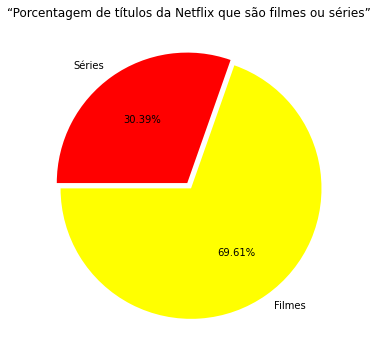

In [ ]:
plt.figure(figsize=(12,6))
plt.title("“Porcentagem de títulos da Netflix que são filmes ou séries”")
g = plt.pie(df.tipo.value_counts(),explode=(0.025,0.025), labels=df.tipo.value_counts().index, colors=['yellow','red'],autopct='%1.2f%%', startangle=180)
plt.show()

In [ ]:
df.dtypes

id                 object
tipo               object
titulo             object
pais               object
data_adicionado    object
ano_lancamento      int64
classificacao      object
duracao            object
genero             object
dtype: object